# <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black;"><strong>Module importations</strong></span>

In [2]:
import scipy.io
import os
import h5py
import numpy as np
from scipy.signal import find_peaks, savgol_filter
import matplotlib.pyplot as plt
# from scipy.stats import sem
from scipy.stats import wilcoxon
import pandas as pd
import json
import jdata as jd
import math

import pickle
import time

from MyModule import *

In [1]:
# import tkinter as tk
# from tkinter import filedialog

# # Créer une fenêtre Tkinter
# root = tk.Tk()
# root.withdraw()  # Cacher la fenêtre principale

# # Afficher la boîte de dialogue de sélection de dossier
# selected_path = filedialog.askdirectory()




Saving_boolean = True


# if __name__=='__main__':
#     selected_path = r'P:\SharedFiles\Abdussamed\Pulvinar_rec_dark_80degs\to_analyze\animal21_a53d1s1_ephys\21a53d1s1_210604_150840'
# else:
#     selected_path = jd.load(os.path.join(r'C:\Users\ayazici\Documents\Analyses\Vestibular_experiments', "path.json"))

selected_path = jd.load(os.path.join(r'C:\Users\ayazici\Documents\Analyses\Vestibular_experiments', "path.json"))

# selected_path = r'P:\SharedFiles\Abdussamed\Pulvinar_rec_dark_80degs\to_analyze\animal20_a40d1s1_ephys\20a40d1s1_200426_142125'
# selected_path = r'P:\SharedFiles\Abdussamed\Pulvinar_rec_dark_80degs\to_analyze\animal20_a41d1s1_ephys_BAD\20a41d1s1_200426_171205'
# selected_path = r'P:\SharedFiles\Abdussamed\Pulvinar_rec_dark_80degs\to_analyze\animal20_a49d1s1_ephys\20a49d1s1_200528_093956'
# selected_path = r'P:\SharedFiles\Abdussamed\Pulvinar_rec_dark_80degs\to_analyze\animal20_a50d1s1_ephys\20a50d1s1_200530_095333'
# selected_path = r'P:\SharedFiles\Abdussamed\Pulvinar_rec_dark_80degs\to_analyze\animal21_a15d1s1_ephys\21a15d1s1_210326_163524'
# selected_path = r'P:\SharedFiles\Abdussamed\Pulvinar_rec_dark_80degs\to_analyze\animal21_a17d1s1_ephys\21a17d1s1_210330_130118'
# selected_path = r'P:\SharedFiles\Abdussamed\Pulvinar_rec_dark_80degs\to_analyze\animal21_a18d1s1_ephys\21a18d1s1_210401_111241'
# selected_path = r'P:\SharedFiles\Abdussamed\Pulvinar_rec_dark_80degs\to_analyze\animal21_a19d1s1_ephys\21a19d1s1_210403_130057'
# selected_path = r'P:\SharedFiles\Abdussamed\Pulvinar_rec_dark_80degs\to_analyze\animal21_a21d1s1_ephys\21a21d1s1_210408_155731'
# selected_path = r'P:\SharedFiles\Abdussamed\Pulvinar_rec_dark_80degs\to_analyze\animal21_a45d1s2_ephys_BAD\21a45d1s2_210526_120819'
# selected_path = r'P:\SharedFiles\Abdussamed\Pulvinar_rec_dark_80degs\to_analyze\animal21_a51d1s1_ephys\21a51d1s1_210602_110516'
# selected_path = r'P:\SharedFiles\Abdussamed\Pulvinar_rec_dark_80degs\to_analyze\animal21_a53d1s1_ephys\21a53d1s1_210604_150840'

In [3]:
# qt for popup window (savable as pdf, svg...), inline for inline plot, notebook for interactive plot, widget for interactive plot
# %matplotlib widget 
# plt.ioff()

# <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>FUNCTIONS</strong></span>

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>find_keys_for_value(data, target_value)</strong></span>

In [3]:
def find_keys(x,y):
    keys = []
    for ext_keys in x.keys():
        for int_keys in x[ext_keys].keys():
            for i in range(len(x[ext_keys][int_keys])):
                if (y.shape == x[ext_keys][int_keys][i].shape) and (np.array([np.array_equal(y[n], x[ext_keys][int_keys][i][n]) for n in range(len(y))])).all():
                    keys.append([ext_keys,int_keys,i])
    return keys[0]

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>plots(row_number, col_number, width, height, *args, suptitle=None,**kwargs)</strong></span>

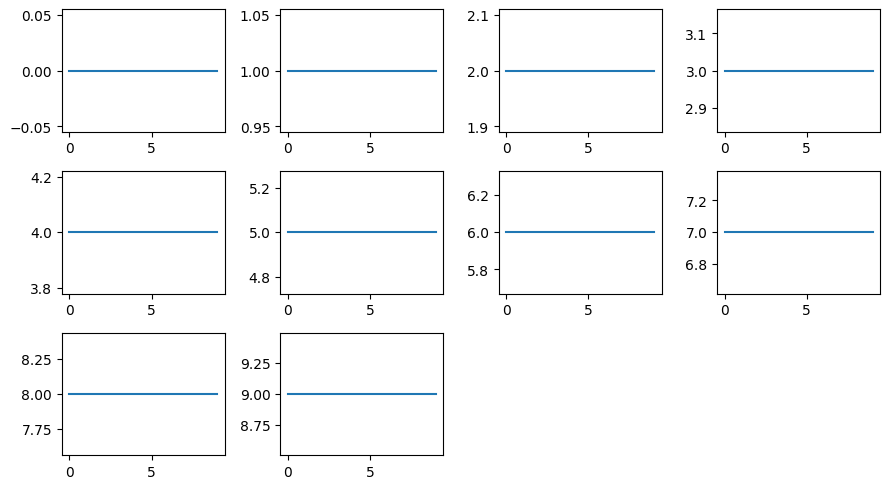

In [237]:
def plots_multiple_with_subplots(*plot_commands, ncols=None, suptitle=None, supxlabel=None, supylabel=None, size=(9, 5), show=True, save=False, filename=None):
    num_plots = len(plot_commands)
    if ncols is None:
        ncols = int(num_plots ** 0.5) + 1  # Calcul automatique du nombre de colonnes

    nrows = (num_plots + ncols - 1) // ncols

    fig = plt.figure(figsize=size)
    # Création des sous-figures
    for i, command in enumerate(plot_commands, start=1):
        plt.subplot(nrows, ncols, i)
        exec(command)

    
    if supxlabel:
        fig.supxlabel(supxlabel)
    if supylabel:
        fig.supylabel(supylabel)
    if suptitle:
        plt.suptitle(suptitle)
    plt.tight_layout()
    if save:
        os.makedirs(os.path.dirname(filename), exist_ok=True)
        plt.savefig(filename)
    if show:
        plt.show()


# plots_multiple_with_subplots(
#     "plt.plot([1, 2, 3], [1, 4, 9],'r')",  # Commande de tracé pour la première sous-figure
#     "plt.plot([1, 2, 3], [10, 5, 0],'g')",  # Commande de tracé pour la deuxième sous-figure
#     "plt.plot([1, 2, 3], [10, 5, 0])",
#     "plt.plot([1, 2, 3], [10, 5, 0])",
#     size=(15,9)
# )

plots_multiple_with_subplots(
    *[f"plt.plot([0,1,2,3,4,5,6,7,8,9],[{i},{i},{i},{i},{i},{i},{i},{i},{i},{i}])" for i in range(10)]
)


In [4]:
def plots(row_number, col_number, *args, suptitle=None, supxlabel=None, supylabel=None, save=False, filename='Several_plots.png', show=True, **kwargs):
    if len(args) != row_number * col_number:
        raise ValueError("Le nombre d'arguments fournis ne correspond pas au nombre de sous-graphiques attendus.")
    
    fig, axs = plt.subplots(row_number, col_number)#, figsize=(width, height))
    
    # Flatten axes if there's only one row or one column
    if row_number == 1 or col_number == 1:
        axs = axs.reshape(-1)
    
    for i, plot_call in enumerate(args):
        if row_number > 1 and col_number > 1:  # If there's more than one row and more than one column
            col = i // row_number
            row = i % row_number
            ax = axs[row, col]
        else:  # If there's only one row or one column
            ax = axs[i]
        plot_call(ax)

    for ax in axs.flat:
        ax.set(**kwargs)

    
    plt.suptitle(suptitle)
    fig.supxlabel(supxlabel)
    fig.supylabel(supylabel)
    
    # plt.tight_layout()
    # fig.set_tight_layout(True)

    if save:
        plt.savefig(filename, bbox_inches='tight')

    if show:
        plt.show() 
    else:
        plt.close()

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>plotVelocity(velocity)</strong></span>

In [304]:
def plotVelocity(velocity, duration, rotationSpeed, timeBef, timeAft, color='c', ax='', xlabel=True, ylabel=True, save=False, filename='velocity.png', show=True):
    # if ax:
    #     ax.plot(duration, velocity, color=color, linewidth='1')
    #     ax.set_ylim(-rotationSpeed, rotationSpeed)
    #     ax.set_xlim(-timeBef, timeAft)
    #     if ylabel:
    #         ax.set_ylabel(r'Mean Velocity $(^\circ/s)$')
    #     if xlabel:
    #         ax.set_xlabel(r'Time $(s)$')
    #     ax.set_yticks([-rotationSpeed, 0, rotationSpeed])
    # else:
    plt.plot(duration, velocity, color=color, linewidth='1')
    plt.ylim(-rotationSpeed, rotationSpeed)
    plt.xlim(-timeBef, timeAft)
    if ylabel:
        plt.ylabel(r'Mean Velocity $(^\circ/s)$')
    if xlabel:
        plt.xlabel(r'Time $(s)$')
    plt.yticks([-rotationSpeed, 0, rotationSpeed])

    if save:
        plt.savefig(filename, bbox_inches='tight')
        plt.close()
    if show:
        plt.show()

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>plotRaster(spikeTimesObject)</strong></span>

In [302]:
def plotRaster(spikeTimesObject, color='black', ax='', xlabel='Time (s)', ylabel='# Trial', extra=None, title='', plotvelocity=False, velocitycolor='k', velocityalpha=0.13, save=False, filename='Raster.png', show=True):

    linelengths = 1

    # if ax:

    #     ax.eventplot(spikeTimesObject, linelengths=linelengths, colors=color)

    #     if ylabel:
    #         ax.set_ylabel(ylabel)
    #     if xlabel:
    #         ax.set_xlabel(xlabel)
            
    #     ax.set_xlim(-timeBef,timeAft)
        
    #     ### annulate the offset due to python indexation
    #     def custom_formatter(x, pos):
    #         return f"{int(x) + 1}"
    #     ax.yaxis.set_major_formatter(plt.FuncFormatter(custom_formatter))

    #     ax.set_ylim(0-linelengths/2,len(spikeTimesObject)-1+linelengths/2)


    #     if plotvelocity:
    #         try:
    #             keys = find_keys(SpikeTimes, spikeTimesObject)
    #         except:
    #             keys = find_keys(SpikeTimesMUA, spikeTimesObject)
    #         condition = keys[0]
    #         direction = keys[1]
    #         normalization = 1/rotationSpeed*len(spikeTimesObject)
    #         rotation = MeanRotation[condition][direction]
            
    #         if min(rotation) < -10:
    #             rotation = rotation * normalization - min(rotation * normalization) - linelengths/2
    #             haxis = len(spikeTimesObject)*np.ones(len(duration))
    #         else:
    #             rotation = rotation * normalization - linelengths/2
    #             haxis = np.zeros(len(duration)) - linelengths/2
    #         ax.plot(duration, rotation, color=velocitycolor, linewidth='1', alpha=velocityalpha)
    #         ax.fill_between(duration, rotation, haxis, color=velocitycolor, alpha=velocityalpha*0.8)


    #     if extra is not None:
    #         extra()
        
    #     ax.set_title(title)
            
    # else:
    plt.eventplot(spikeTimesObject, linelengths=linelengths, colors=color)


    if extra is not None:
        extra()
    
    if ylabel:
        plt.ylabel(ylabel)
    if xlabel:
        plt.xlabel(xlabel)
    
    plt.xlim(-timeBef,timeAft)
    

    ### annulate the offset due to python indexation
    def custom_formatter(x, pos):
        return f"{int(x) + 1}"
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(custom_formatter))

    plt.ylim(0-linelengths/2,len(spikeTimesObject)-1+linelengths/2)

    if plotvelocity:
        try:
            keys = find_keys(SpikeTimes, spikeTimesObject)
        except:
            keys = find_keys(SpikeTimesMUA, spikeTimesObject)
        condition = keys[0]
        direction = keys[1]
        normalization = 1/rotationSpeed*len(spikeTimesObject)
        rotation = MeanRotation[condition][direction]
        
        if min(rotation) < -rotationSpeed/2:
            rotation = rotation * normalization - min(rotation * normalization) - linelengths/2
            haxis = len(spikeTimesObject)*np.ones(len(duration))
        else:
            rotation = rotation * normalization - linelengths/2
            haxis = np.zeros(len(duration)) - linelengths/2
        plt.plot(duration, rotation, color=velocitycolor, alpha=velocityalpha)
        plt.fill_between(duration, rotation, haxis, color=velocitycolor, alpha=velocityalpha*0.8)

    plt.title(title)

    if save:
        plt.savefig(filename, bbox_inches='tight')
        plt.close()
    elif show:
        plt.show()

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>plotPSTH(StudiedSpikeTimes)</strong></span>

In [182]:
def plotPSTH(SpikeTimesObject, condition, direction, unit,color='k',shadedcolor='c',binResolution = 0.03,ax='',xlabel=True,ylabel=True, title='', save=False, filename='PSTH.png', show=True):
    if type(unit)==list:
        if type(direction)==list:
            StudiedSpikeTimes =  np.concatenate([np.concatenate([SpikeTimesObject[condition][y][i] for i in unit]) for y in direction])
        else:
            StudiedSpikeTimes = np.concatenate([SpikeTimesObject[condition][direction][i] for i in unit])
    else:
        if type(direction)==list:
            StudiedSpikeTimes = np.concatenate([SpikeTimesObject[condition][directiony][unit] for directiony in direction])
        else:
            StudiedSpikeTimes = SpikeTimesObject[condition][direction][unit]

    if condition == 'first':
        xmin = -timeBef
        xmax = timeAft
    elif condition == 'second':
        xmin = -timeBef - duration[shiftReference]
        xmax = timeAft - duration[shiftReference]


    # if ax:
    #     local_trial_number = len(StudiedSpikeTimes)

    #     spike_number_per_trial = [[] for _ in range(local_trial_number)]
    #     edges = []
    #     unitary_firing_rate = [[] for _ in range(local_trial_number)]

    #     for trial in range(local_trial_number):
    #         spike_number_per_trial[trial], edges = np.histogram(StudiedSpikeTimes[trial], bins=np.arange(-timeBef, timeAft + binResolution, binResolution))

    #     frequency_per_trial = [[spike_number_per_trial[trial][bin]/binResolution for bin in range(len(edges)-1)] for trial in range(local_trial_number)]
    #     mean_frequency = [np.mean([frequency_per_trial[trial][bin] for trial in range(local_trial_number)]) for bin in range(len(edges)-1)]

    #     Zscore = (mean_frequency - np.mean(mean_frequency)) / np.std(mean_frequency) if np.std(mean_frequency) != 0 else np.zeros(len(mean_frequency))
    #     Zunitary = (frequency_per_trial - np.mean(mean_frequency)) / np.std(mean_frequency) if np.std(mean_frequency) != 0 else np.zeros(len(frequency_per_trial))
    #     SEM = np.std(Zunitary)/np.sqrt(len(Zunitary)) if np.std(mean_frequency) != 0 else np.zeros(len(mean_frequency))


    #     # plt.figure(figsize=(15,6))
    #     ax.plot(edges[:-1], Zscore, color=color)
    #     ax.fill_between(edges[:-1], Zscore-SEM, Zscore+SEM, alpha=0.1, color=shadedcolor)
    #     ax.set_xlim(xmin,xmax)
    #     if ylabel:
    #         ax.set_ylabel('Z-Score FR')
    #     if xlabel:
    #         ax.set_xlabel('Time (s)')

    #     ax.set_title(title)

    # else:
    local_trial_number = len(StudiedSpikeTimes)

    spike_number_per_trial = [[] for _ in range(local_trial_number)]
    edges = []
    unitary_firing_rate = [[] for _ in range(local_trial_number)]

    for trial in range(local_trial_number):
        spike_number_per_trial[trial], edges = np.histogram(StudiedSpikeTimes[trial], bins=np.arange(-timeBef, timeAft + binResolution, binResolution))

    if condition == 'second':
        edges = edges - duration[shiftReference]

    frequency_per_trial = [[spike_number_per_trial[trial][bin]/binResolution for bin in range(len(edges)-1)] for trial in range(local_trial_number)]
    mean_frequency = [np.mean([frequency_per_trial[trial][bin] for trial in range(local_trial_number)]) for bin in range(len(edges)-1)]

    Zscore = (mean_frequency - np.mean(mean_frequency)) / np.std(mean_frequency) if np.std(mean_frequency) != 0 else np.zeros(len(mean_frequency))
    Zunitary = (frequency_per_trial - np.mean(mean_frequency)) / np.std(mean_frequency) if np.std(mean_frequency) != 0 else np.zeros(len(frequency_per_trial))
    SEM = np.std(Zunitary)/np.sqrt(len(Zunitary)) if np.std(mean_frequency) != 0 else np.zeros(len(mean_frequency))


    # plt.figure(figsize=(15,6))
    plt.plot(edges[:-1], Zscore, color=color)
    plt.fill_between(edges[:-1], Zscore-SEM, Zscore+SEM, alpha=0.1, color=shadedcolor)
    plt.xlim(xmin,xmax)
    if ylabel:
        plt.ylabel('Z-Score FR')
    if xlabel:
        plt.xlabel('Time (s)')

    plt.title(title)

    if save:
        plt.savefig(filename, bbox_inches='tight')
        plt.close()
    elif show:
        plt.show()

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>figure1(unit)</strong></span>

In [300]:
def figure1(unit,duration, rotationSpeed, timeBef, timeAft, firstcolor='red',secondcolor='blue',binResolution=0.03, save=False, filename='figure 1.png'):
      # plots(3, 2,
      #       lambda ax: plotVelocity(MeanRotation['first']['CW'],duration, rotationSpeed, timeBef, timeAft,color=firstcolor, ax=ax, xlabel=False),
      #       lambda ax: plotRaster(SpikeTimes['first']['CW'][unit], color=firstcolor, ax=ax, xlabel=False),
      #       lambda ax: plotPSTH(SpikeTimes, 'first', 'CW', unit, color=firstcolor, shadedcolor=firstcolor, ax=ax),
      #       lambda ax: plotVelocity(MeanRotation['second']['CCW'],duration, rotationSpeed, timeBef, timeAft,color=secondcolor,ax=ax,ylabel=False,xlabel=False),
      #       lambda ax: plotRaster(SpikeTimes['second']['CCW'][unit], color=secondcolor, ax=ax,xlabel=False,ylabel=False),
      #       lambda ax: plotPSTH(SpikeTimes, 'second', 'CCW', unit,color=secondcolor, shadedcolor=secondcolor, ax=ax,ylabel=False),
      #       suptitle=f"Figure 1: Unit {unit}",
      #       save=save,
      #       filename=filename
      # )
      plots_multiple_with_subplots(
            f"plotVelocity(MeanRotation['second']['CW'],duration, rotationSpeed, timeBef, timeAft,color='{firstcolor}', xlabel=False, show=False)",
            f"plotVelocity(MeanRotation['second']['CCW'],duration, rotationSpeed, timeBef, timeAft,color='{secondcolor}',ylabel=False,xlabel=False, show=False)",
            f"plotRaster(SpikeTimes['second']['CW'][{unit}], color='{firstcolor}', xlabel=False, show=False)",
            f"plotRaster(SpikeTimes['second']['CCW'][{unit}], color='{secondcolor}',xlabel=False,ylabel=False, show=False)",
            f"plotPSTH(SpikeTimes, 'second', 'CW', {unit}, color='{firstcolor}', shadedcolor='{firstcolor}', show=False)",
            f"plotPSTH(SpikeTimes, 'second', 'CCW', {unit},color='{secondcolor}', shadedcolor='{secondcolor}',ylabel=False, show=False)",
            suptitle=f"Figure 1: Unit {unit}",
            save=save,
            filename=filename,
            ncols=2
      )

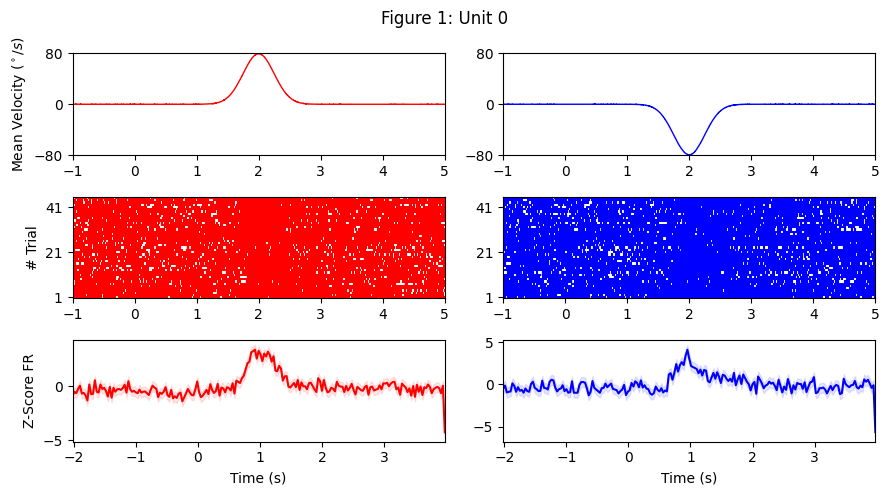

In [301]:
figure1(0, duration, rotationSpeed, timeBef, timeAft, save=False, filename='figure 1.png')

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>seeModulation(condition, modulated)</strong></span>

In [9]:
def seeModulation(condition,modulated, color='k', velocitycolor='k', velocityalpha=0.13, save=False, filename='Modulation', show = True):
      if condition == 'first':
            position = np.where(modulation[condition]==modulated)[0]
            print(f'The {modulated} modulated neurons are {position}')

            for unit in position:
                  foo = np.concatenate((SpikeTimes[condition]['CW'][unit], SpikeTimes[condition]['CCW'][unit], SpikeTimes[condition]['NotResponding'][unit]))
                  plt.eventplot(foo, linelengths=1)
                  plt.margins(0)
                  plt.xlabel('Time (s)')
                  plt.ylabel('# trial')
                  plt.title(f'Photo-tagged unit#{unit}')
                  # plt.rcParams['axes.spines.right'] = True
                  # plt.rcParams['axes.spines.top'] = True
                  # plt.rcParams['axes.spines.bottom'] = True
                  # plt.rcParams['axes.spines.left'] = True
                  plt.xlim(-0.5,1)
                  if save:
                        plt.savefig(filename, bbox_inches='tight')
                  if show:
                        plt.show()
                  else:
                        plt.close()
                  print('\n')
      elif condition == 'second':
            position = np.where([(modulation[condition][neuron]['selectivity']==modulated.split()[0]) and (modulation[condition][neuron]['type']==modulated.split()[1]) for neuron in range(Nclust)])[0]
            print(f'The {modulated} modulated neurons are {position}')

            by = modulated.split()[0]
            how = modulated.split()[1]

            for unit in np.where([modulation[condition][neuron]['selectivity']==by and modulation[condition][neuron]['type']==how for neuron in range(Nclust)])[0]:
                  plots(2,1,
                        lambda ax: plotRaster(SpikeTimes[condition]['CW'][unit], color=color, ax=ax, xlabel=False, ylabel=False, plotvelocity=True, velocitycolor=velocitycolor, velocityalpha=velocityalpha),
                        lambda ax: plotRaster(SpikeTimes[condition]['CCW'][unit], color=color, ax=ax, xlabel=False, ylabel=False, plotvelocity=True, velocitycolor=velocitycolor, velocityalpha=velocityalpha),
                        suptitle=f'Unit {unit} {modulated} modulated',
                        supxlabel='Time (s)',
                        supylabel='# Trial',
                        save=save,
                        filename=filename,
                        show=show
                        )
                  print('\n')

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>split_path(path)</strong></span>

In [10]:
def split_path(path):
    drive, path_without_drive = os.path.splitdrive(path)
    path_segments = []
    while True:
        head, tail = os.path.split(path_without_drive)
        if tail:
            path_segments.insert(0, tail)
            path_without_drive = head
        else:
            if head:
                path_segments.insert(0, head)
            break
    path_segments.insert(0, drive)
    return path_segments

# <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Initiation</strong></span>

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Paths</strong></span>

In [11]:
parent_folder = os.path.dirname(selected_path)
saving_folder = r'C:\Users\ayazici\Documents\Analyses\Vestibular_experiments'

exp_id = "_".join([element for element in split_path(selected_path) if 'animal' in element][0].split('_')[0:2])

# cleaned_path = os.path.normpath(selected_path)

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Determination of Parameters</strong></span>

In [12]:
timeBef           = 1                  # seconde, for trial sectionning
timeAft           = 5                  # seconde, for trial sectionning
refValue          = 'din04'
chanSpace         = 20                 #um
rotationSpeed     = 80                 #deg/s
ProbeType         = '32_optoElectrode'

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Data Importation</strong></span>

### For MUA

In [13]:
times_polytrodeAll = scipy.io.loadmat(os.path.join(selected_path, 'times_polytrodeAll.mat'))
m_class = times_polytrodeAll['mua_class']
'''
m_class[:,0] : indice of the cluster for each index
m_class[:,1] : time of the spike in ms
m_class[:,1]/1000 : time of the spike in s
'''

muaWf = times_polytrodeAll['clusWFmua']

### For SUA

In [14]:
c_class = times_polytrodeAll['cluster_class']  # units and associated time spiking

temp_idx = c_class[:,0]    # units

# find the units and remove the MUA
units = temp_idx!=0
temp_clus = c_class[units,0]

Nclust = len(np.unique(temp_clus))

# if not studied_unit:
#     studied_unit = list(range(1,Nclust+1))

temp_time = c_class[units,1]/1000  # temps de spike en seconde

temp_time_clust = []

for unit in range(Nclust):
    temps_spikes_sec = c_class[np.where(c_class[:,0]==unit)][:,1] / 1000
    temp_time_clust.append(temps_spikes_sec)

### General

In [15]:
clusterParam = h5py.File(os.path.join(selected_path,'rez.mat'),'r')['rez']
infos = clusterParam['ops']
f = int(infos['fs'][0][0])

os.chdir(parent_folder)

table_velocity = np.squeeze(h5py.File(os.path.join(parent_folder, f"{exp_id}_ADC00.mat"), 'r')['data'])

try:
    stereotaxic = h5py.File(os.path.join(parent_folder, f"VelocityData_{exp_id}.mat"), 'r')
except:
    stereotaxic = scipy.io.loadmat(os.path.join(parent_folder, f"VelocityData_{exp_id}.mat"))
ML_pos = np.squeeze(stereotaxic['All_ML'])[0]
AP_pos = np.squeeze(stereotaxic['All_AP'])[0]

In [16]:
#Load all the digital Input on the workspace

#DIN01 => photodiiode 1 is trig CAM
#DIN02 => LED
#DIN03 => trig ttl frame camera
#DIN04 => photodiiode 2 is the VS and start turntable

din = {
    '01':[],
    '02':[],
    '03':[],
    '04':[]
}

for dinkey in din.keys():
    filename = exp_id + '_DIN'+ str(dinkey) + '.mat'
    #with h5py.File(filename, 'r') as file:
    #    din[str(dinkey)] = file['data'][:]
    din[str(dinkey)] = np.squeeze(h5py.File(filename, 'r')['data'])


if refValue == 'din01':
    ref = din['01']
elif refValue == 'din02':
    ref = din['02']
elif refValue == 'din03':
    ref = din['03']
elif refValue == 'din04':
    ref = din['04']
else:
    print('Take a look to the indicated ref din')


time = np.arange(len(din['01'])) / f

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Trials beginning</strong></span>

In [17]:
foo = np.diff(ref)
dref = np.insert(foo, 0, 0)

peaks = np.where(dref == 1)[0]
pic_position = np.array([peaks[0]])

thresholdTime = np.where(dref == -1)[0][0] - np.where(dref == 1)[0][0] + 1 * f

for i in range(len(peaks) - 1, 0, -1):
    if peaks[i] - peaks[i - 1] > thresholdTime:
        pic_position = np.append(pic_position, peaks[i])

pic_position = np.sort(pic_position)

Ntrial = len(pic_position)

print("Number of trials :", Ntrial)

Number of trials : 219


## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Protocol Separation</strong></span>

In [18]:
# Find protocol separation index
mediane_NindexBetweenTrials = np.median(np.diff(pic_position))  # en # indices
thresholdProtocol = 5 * mediane_NindexBetweenTrials  # seuil en indice
thresholdIndex = pic_position[np.ravel(np.where(np.diff(pic_position) > thresholdProtocol))[0]]  # indice d'exclusion
thresholdTrial = np.where(pic_position > thresholdIndex)[0][0]  # trial d'exclusion

# <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Rotation Objects</strong></span>

In [36]:
RotationWise = {'first': [], 'second': []}

Rotation = {
    'first': {'CW' : [], 'CCW': [], 'NotResponding': []},
    'second': {'CW': [], 'CCW': [], 'NotResponding': []}
}


comparateur = np.mean(table_velocity[:10*f])
coefficient = 0.5

for trial in range(Ntrial):
    lowerIdx = pic_position[trial] - timeBef*f
    upperIdx = pic_position[trial] + timeAft*f
    velocityBetween = table_velocity[lowerIdx:upperIdx]
    seuilCW = velocityBetween > comparateur*(1+coefficient)
    seuilCCW = velocityBetween < comparateur*(1-coefficient)

    if np.sum(seuilCW) != 0:
        RotationWise['first'].append('CW') if trial < thresholdTrial else RotationWise['second'].append('CW')
        Rotation['first']['CW'].append(velocityBetween) if trial < thresholdTrial else Rotation['second']['CW'].append(velocityBetween)
    elif np.sum(seuilCCW) != 0:
        RotationWise['first'].append('CCW') if trial < thresholdTrial else RotationWise['second'].append('CCW')
        Rotation['first']['CCW'].append(velocityBetween) if trial < thresholdTrial else Rotation['second']['CCW'].append(velocityBetween)
    else:
        RotationWise['first'].append('NotResponding') if trial < thresholdTrial else RotationWise['second'].append('NotResponding')
        Rotation['first']['NotResponding'].append(velocityBetween) if trial < thresholdTrial else Rotation['second']['NotResponding'].append(velocityBetween)

# Convertir les listes en tableaux NumPy
RotationWise['first'] = np.array(RotationWise['first'])
RotationWise['second'] = np.array(RotationWise['second'])

for direction in ['CW', 'CCW', 'NotResponding']:
    Rotation['first'][direction] = np.array(Rotation['first'][direction])
    Rotation['second'][direction] = np.array(Rotation['second'][direction])

duration = np.arange(-timeBef, timeAft, 1/f)

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Velocity plots</strong></span>

In [65]:
MeanRotation = {
    'first': {'CW' : [], 'CCW': [], 'NotResponding': []},
    'second': {'CW': [], 'CCW': [], 'NotResponding': []},
}

for condition in MeanRotation:
    for direction in MeanRotation[condition]:
        stock_velocities = []

        for trial in range(len(Rotation[condition][direction])):
            baseline = Rotation[condition][direction][trial][:1*f]
            unreduced = savgol_filter(Rotation[condition][direction][trial],50,3) - np.mean(baseline)
            operational_velocity = unreduced / max(abs(unreduced))*rotationSpeed

            stock_velocities.append(operational_velocity)

        MeanRotation[condition][direction] = np.mean(stock_velocities, axis=0)

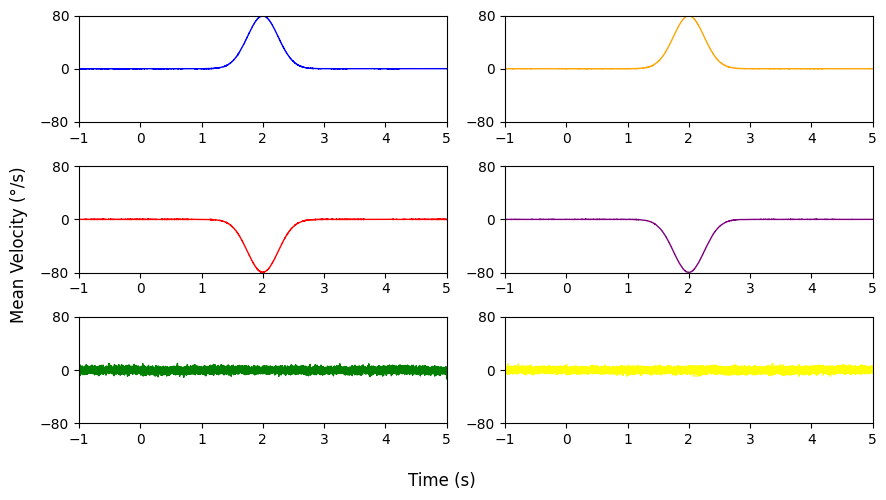

In [267]:
plots_multiple_with_subplots(
    "plotVelocity(MeanRotation['first']['CW'], duration, rotationSpeed, timeBef, timeAft, color='blue', xlabel=False, ylabel=False, show=False)",
    "plotVelocity(MeanRotation['second']['CW'], duration, rotationSpeed, timeBef, timeAft, color='orange', xlabel=False, ylabel=False, show=False)",
    "plotVelocity(MeanRotation['first']['CCW'], duration, rotationSpeed, timeBef, timeAft, color='red', xlabel=False, ylabel=False, show=False)",
    "plotVelocity(MeanRotation['second']['CCW'], duration, rotationSpeed, timeBef, timeAft, color='purple', xlabel=False, ylabel=False, show=False)",
    "plotVelocity(MeanRotation['first']['NotResponding'], duration, rotationSpeed, timeBef, timeAft, color='green', xlabel=False, ylabel=False, show=False)",
    "plotVelocity(MeanRotation['second']['NotResponding'], duration, rotationSpeed, timeBef, timeAft, color='yellow', xlabel=False, ylabel=False, show=False)",
    supxlabel='Time (s)',
    supylabel='Mean Velocity (°/s)',
    ncols=2
)

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Shift between 0 and rotation</strong></span>

In [ ]:
baseline = np.mean(MeanRotation['first']['CW'][:1*f])
std = np.std(MeanRotation['first']['CW'][:1*f])
threshold = 4*std

shiftReference = np.where(MeanRotation['first']['CW'] > baseline + threshold)[0][0]
del baseline, std, threshold

# <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>MUA Analysis</strong></span>

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Depths determination</strong></span>

In [47]:
# get the number of units
Nclust_mua = len(np.unique(m_class[:,0]))
ind_mua = m_class[:,0]


# find the peak wf to find the depth
szm = muaWf.shape
# DEPTH of the unit
# Get the mua activity that is in index 0 of the clusWF

allBasem = np.zeros((szm[1],szm[2]))
PkDepthUnit = np.zeros((szm[0], 1))
minMatrixm = np.zeros((szm[0], 1))

for spm in range(szm[0]):
    baselinem = np.mean(muaWf[spm][0:5],axis=0)-500 # offset -500 for potential positive baseline

    for bm in range(szm[2]):
        allBasem[:,bm] = baselinem[bm]*np.ones((szm[1]))

    spikeWavm = muaWf[spm,:,:]-500
    wfm = spikeWavm - allBasem

    minMatrixm[spm] = np.min(wfm)

    argMm = np.where(wfm==minMatrixm[spm])
    # get the depth of the unit
    uout = np.unique(argMm[1])
    argMm = []
    argMm = uout[0]
    PkDepthUnit[spm] = (argMm+1)*chanSpace # +1 because of Python indexation

In [48]:
x = 0 # depth of the tetrode

mapp = np.squeeze(infos['chanMap'])

if len(mapp)==32:
    Ntet = 16
elif len(mapp)==64:
    Ntet = 32
    chanSpace = chanSpace/2
else:
    print('WEIRD NUMBER OF TETRODES')

ArgallLayers = {i: [] for i in range(Ntet)}

factorTet = chanSpace * len(mapp)/Ntet

for lay in range(Ntet):
    # H5 electrode
    if np.sum(mapp[0:4]==[33, 38, 44, 40])==4:
        ArgallLayers[lay] = np.where((PkDepthUnit <= x+factorTet) & (PkDepthUnit > x))[0]
    else:
        ArgallLayers[lay] = np.where((PkDepthUnit <= x+factorTet) & (PkDepthUnit > x))[0]
    x += factorTet

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Associating tetrodes with depth</strong></span>

In [49]:
m_class_tet = np.zeros((len(m_class),2))


# First column
for tet in ArgallLayers:
    for unit in ArgallLayers[tet]:
        pos = np.where(m_class[:,0]-1 == unit)[0]
        m_class_tet[pos,0] = tet
        
# Second column 
m_class_tet[:,1] = m_class[:,1]

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Spiking times of tetrodes</strong></span>

In [50]:
AllSpikeTimesMUA = np.empty((Ntet,Ntrial),dtype=object)


for tet in range(Ntet):
    spikingTimeTet = m_class_tet[np.where(m_class_tet[:,0] == tet)[0],1]/1000

    for trial in range(Ntrial):
        upperTime = pic_position[trial]/f + timeAft
        lowerTime = pic_position[trial]/f - timeBef
        bornes = np.where((spikingTimeTet > lowerTime) & (spikingTimeTet < upperTime))[0]
        AllSpikeTimesMUA[tet][trial] = spikingTimeTet[bornes] - lowerTime - timeBef

In [51]:
SpikeTimesMUA = {
    'first': {
        'CW': [[] for _ in range(Ntet)],
        'CCW': [[] for _ in range(Ntet)],
        'NotResponding': [[] for _ in range(Ntet)]
    },
    'second': {
        'CW': [[] for _ in range(Ntet)],
        'CCW': [[] for _ in range(Ntet)],
        'NotResponding': [[] for _ in range(Ntet)]
    }
}


for tet in range(len(AllSpikeTimesMUA)):
    for trial in range(Ntrial):

        condition = 'first' if trial < thresholdTrial else 'second'
        trialIndex = trial if trial < thresholdTrial else trial - thresholdTrial

        if RotationWise[condition][trialIndex] == 'CW':
            direction = 'CW'
        elif RotationWise[condition][trialIndex] == 'CCW':
            direction = 'CCW'
        else:
            direction = 'NotResponding'
        
        SpikeTimesMUA[condition][direction][tet].append([AllSpikeTimesMUA[tet][trial]])

        
for condition in SpikeTimesMUA:
    for direction in SpikeTimesMUA[condition]:
        for tet in range(len(SpikeTimesMUA[condition][direction])):
            SpikeTimesMUA[condition][direction][tet] = np.array([SpikeTimesMUA[condition][direction][tet][trial][0] for trial in range(len(SpikeTimesMUA[condition][direction][tet]))], dtype=object)

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Automatic detection of 0</strong></span>

In [52]:
for tet in range(Ntet):
    if (SpikeTimesMUA['second']['CW'][tet].size == 0) and (SpikeTimesMUA['second']['CW'][tet+1].size != 0):
        LP_ref = tet+1
        break

for tet in range(Ntet):
    if (SpikeTimesMUA['second']['CCW'][tet].size == 0) and (SpikeTimesMUA['second']['CCW'][tet+1].size != 0):
        if LP_ref != tet+1:
            raise Exception("Do detection manually bro.")
        break

print(f"Automatic detection of the LP is the tetrode #{LP_ref} (Python indexation)")

Automatic detection of the LP is the tetrode #1 (Python indexation)


In [53]:
DepthTetrode = np.zeros(Ntet)
AllDepth = np.zeros(Nclust)

for tet in range(Ntet):
    DepthTetrode[tet] = (tet-LP_ref)*factorTet

for unit in range(Nclust):
    AllDepth[unit] = PkDepthUnit[unit][0] - LP_ref*factorTet

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Saving Figures</strong></span>

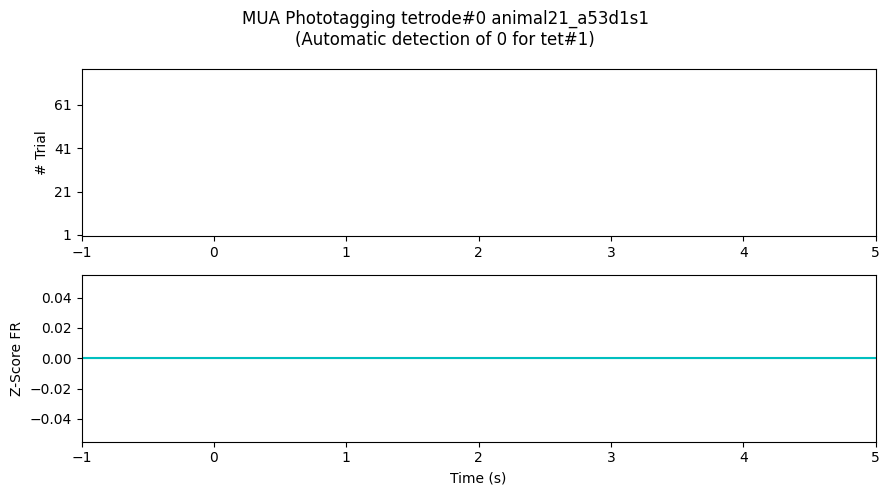

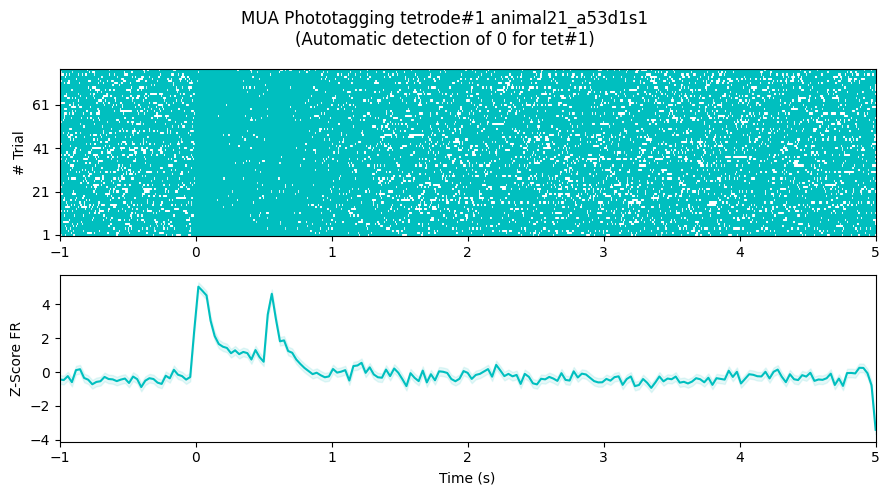

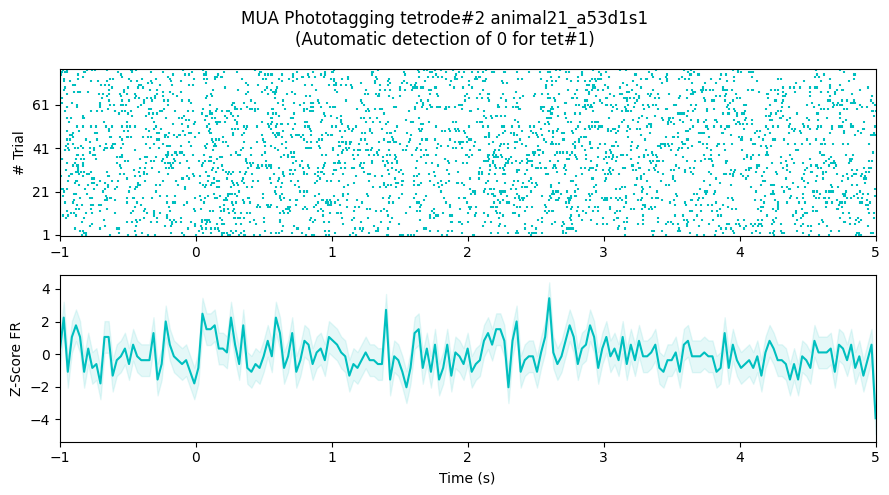

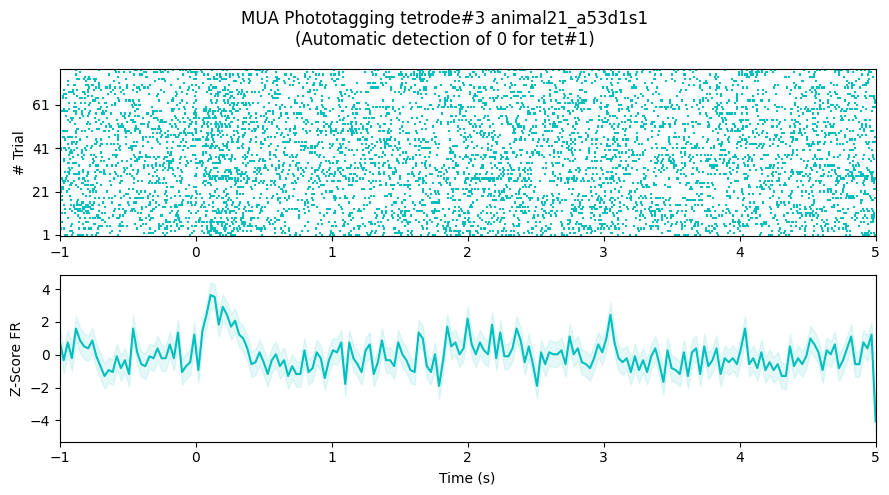

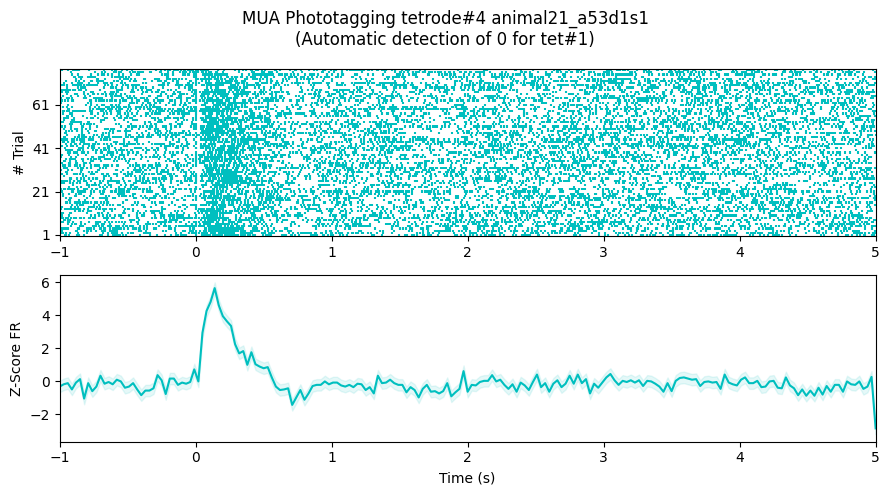

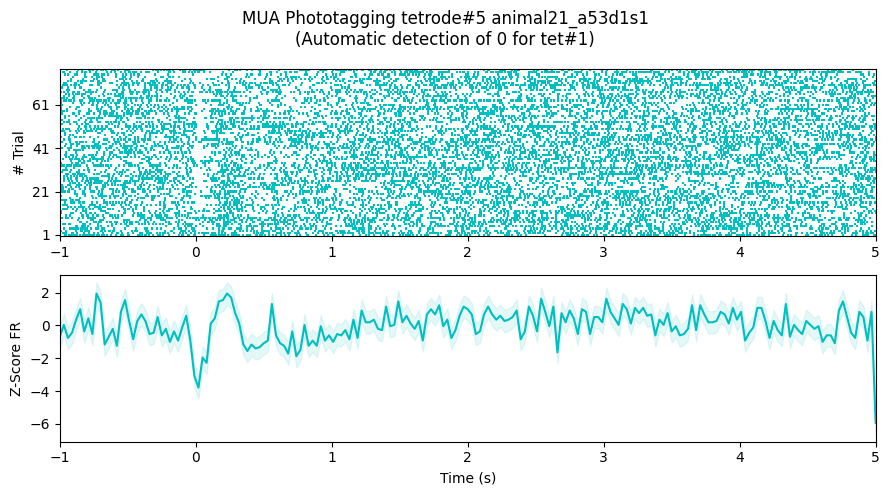

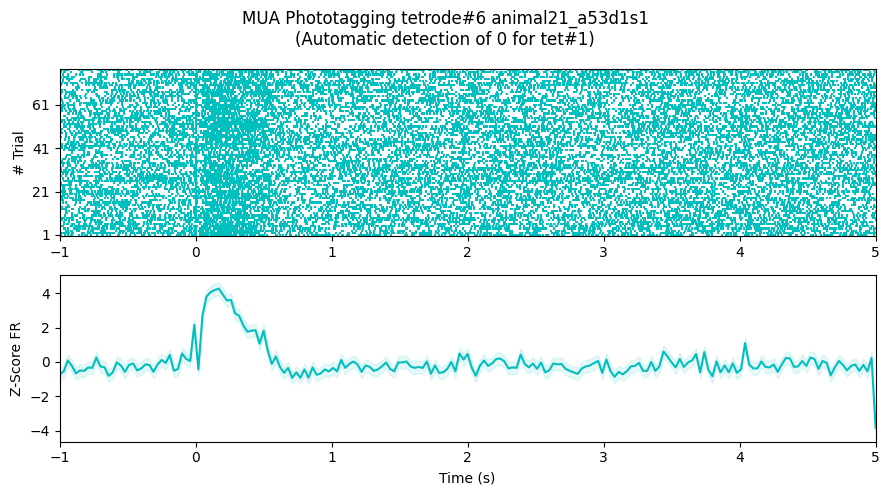

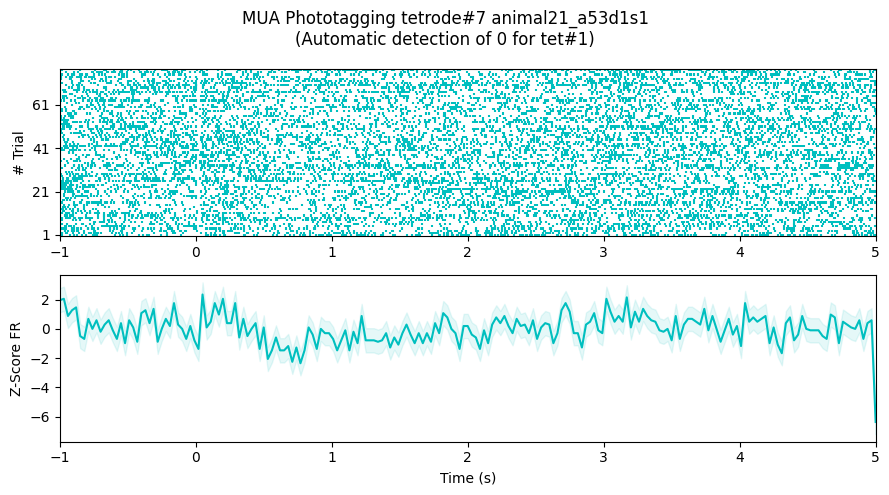

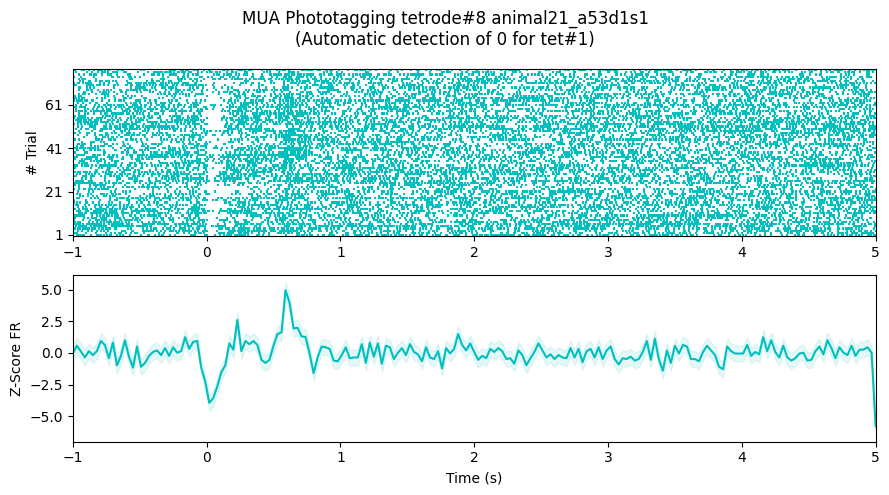

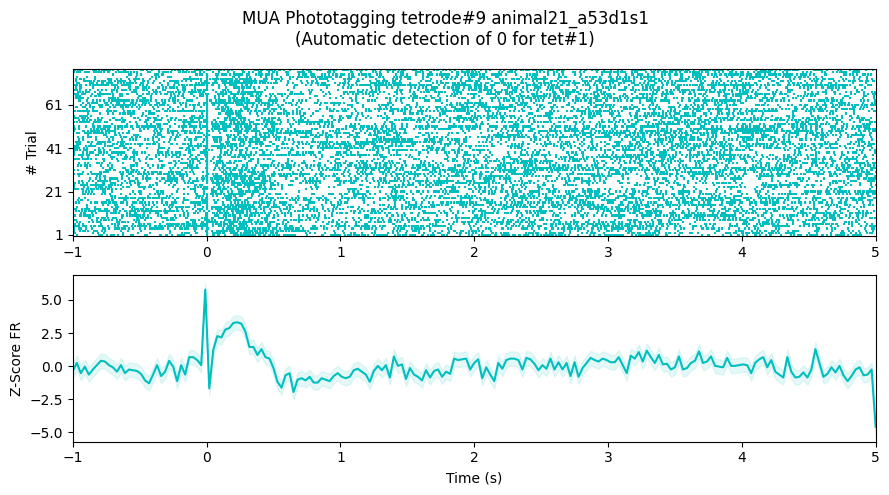

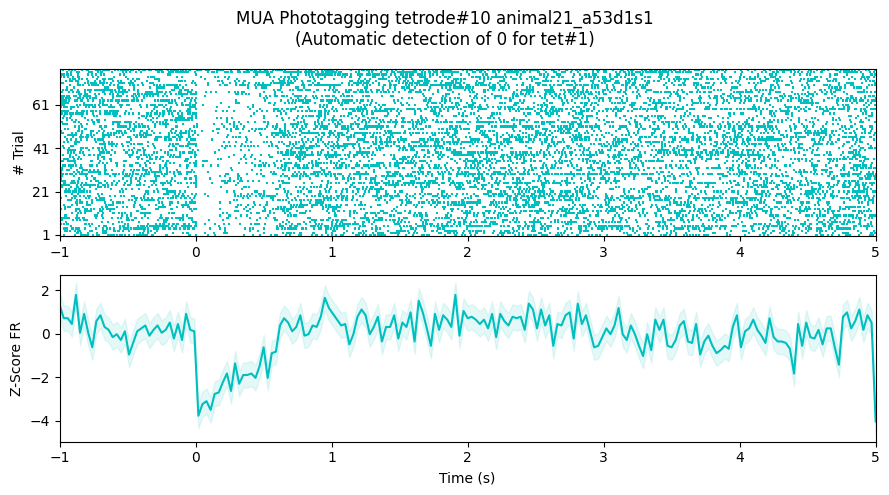

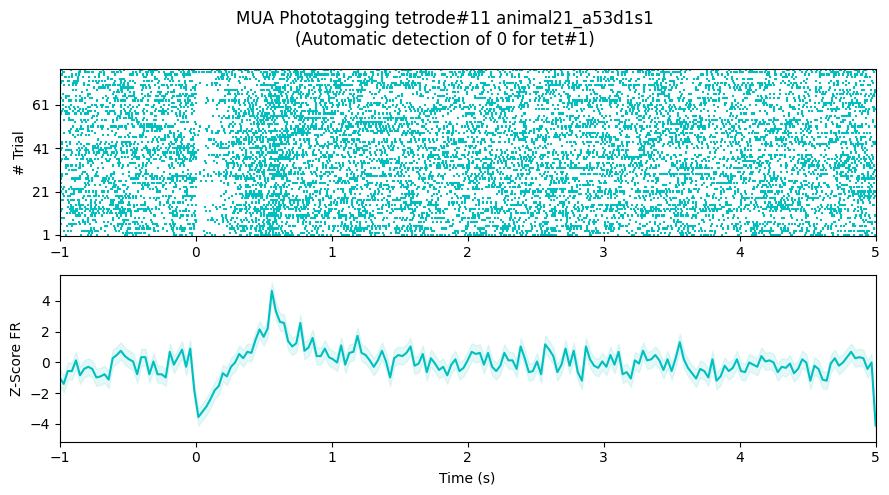

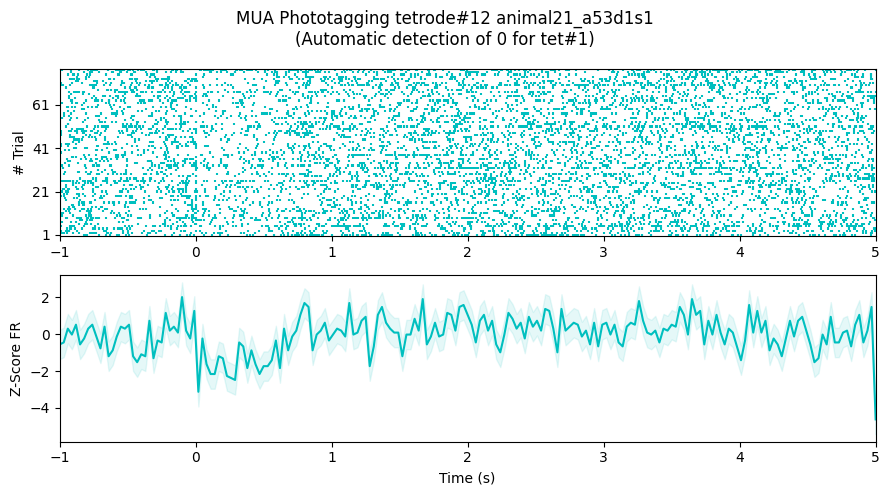

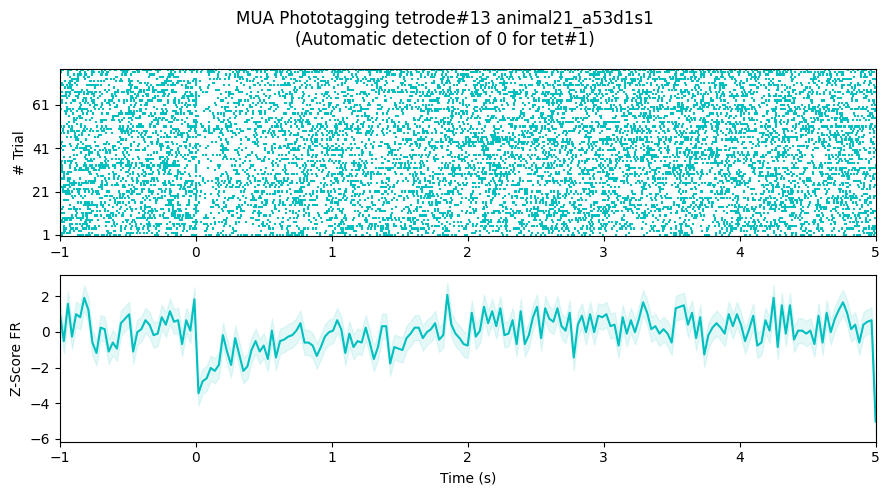

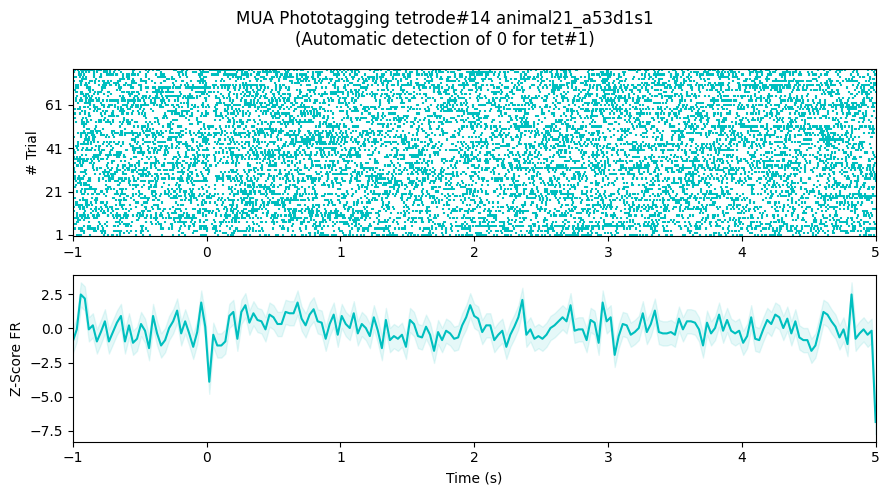

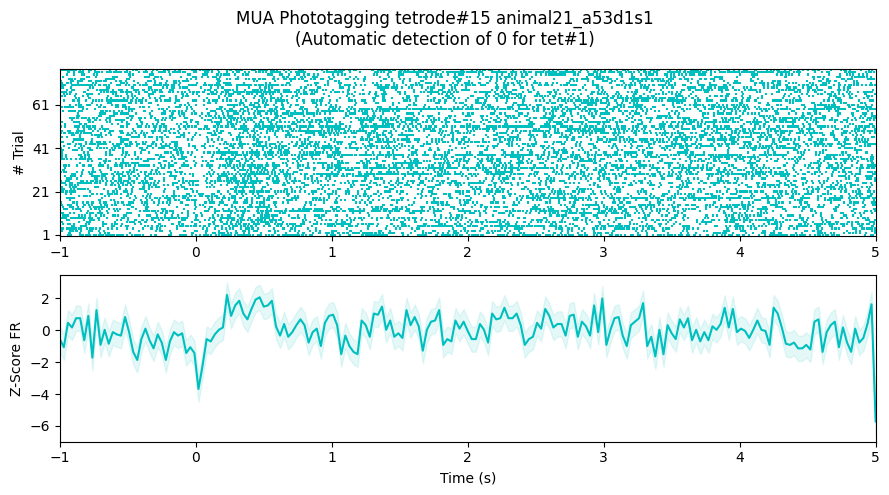

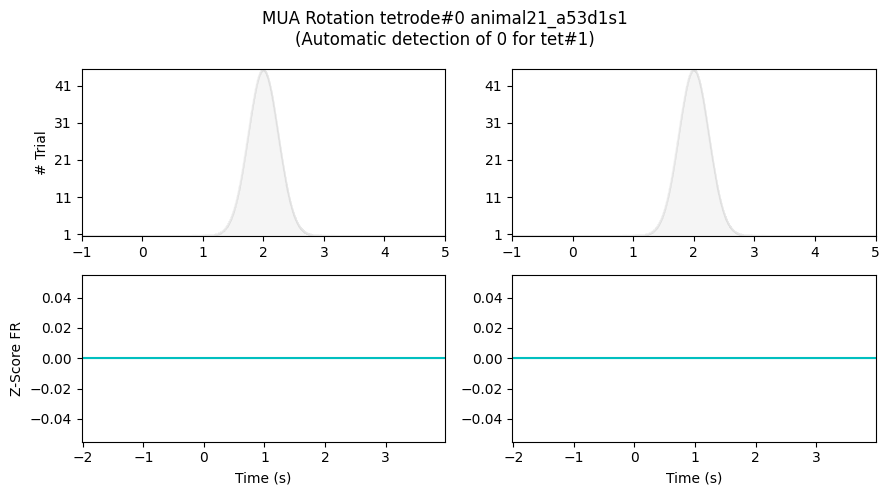

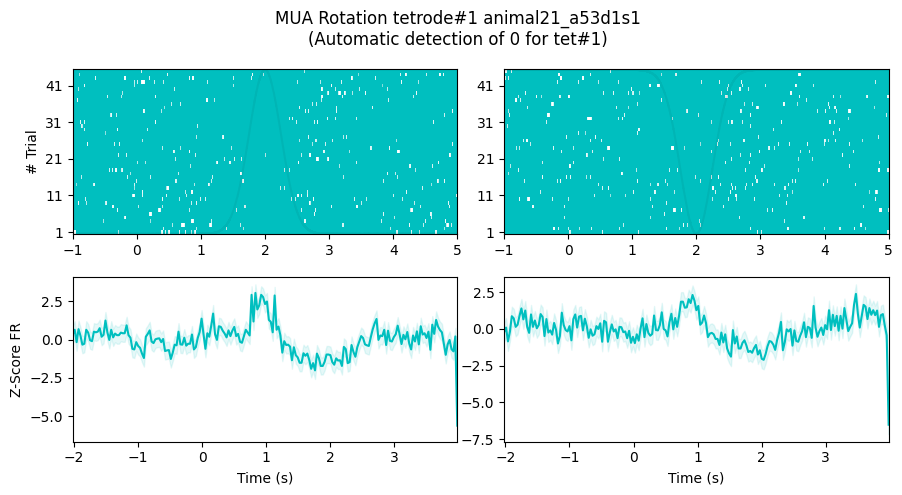

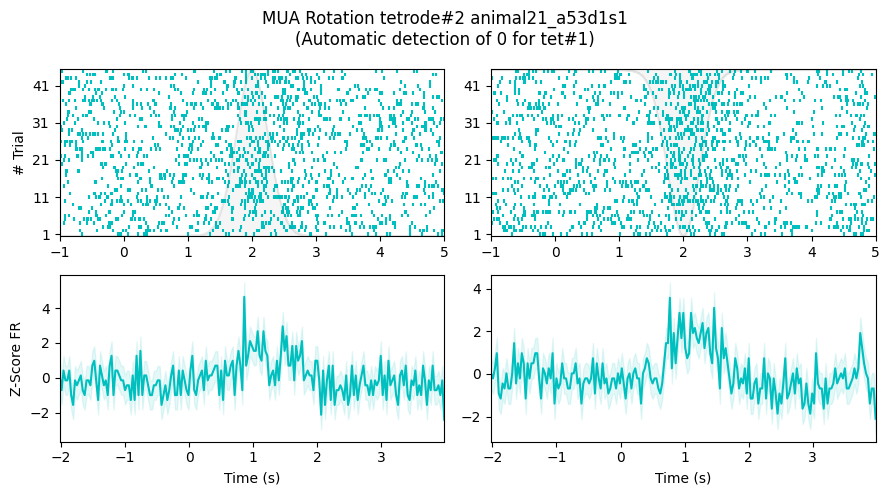

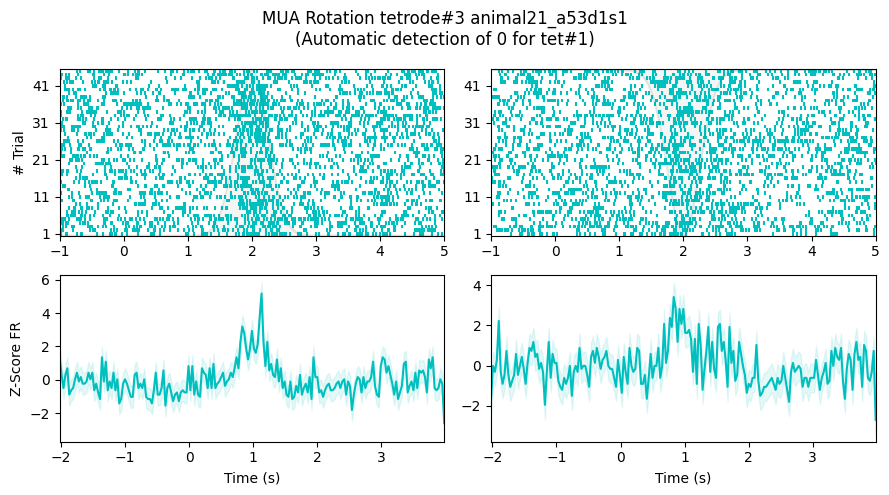

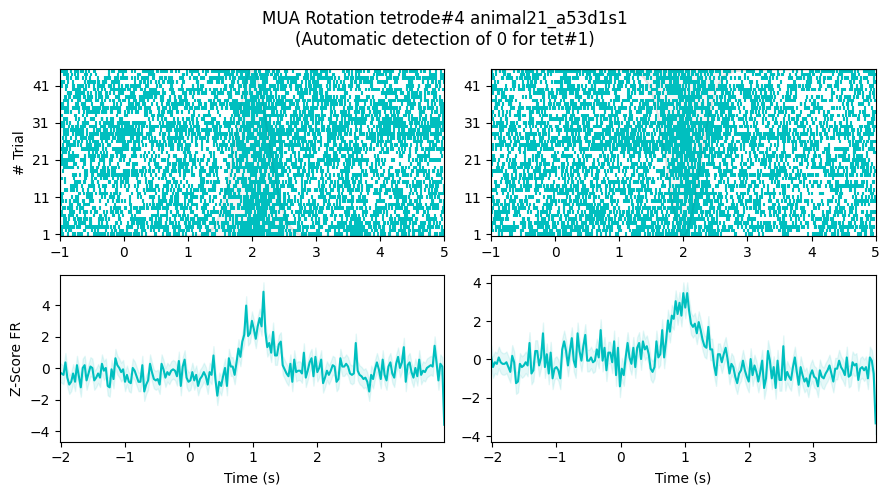

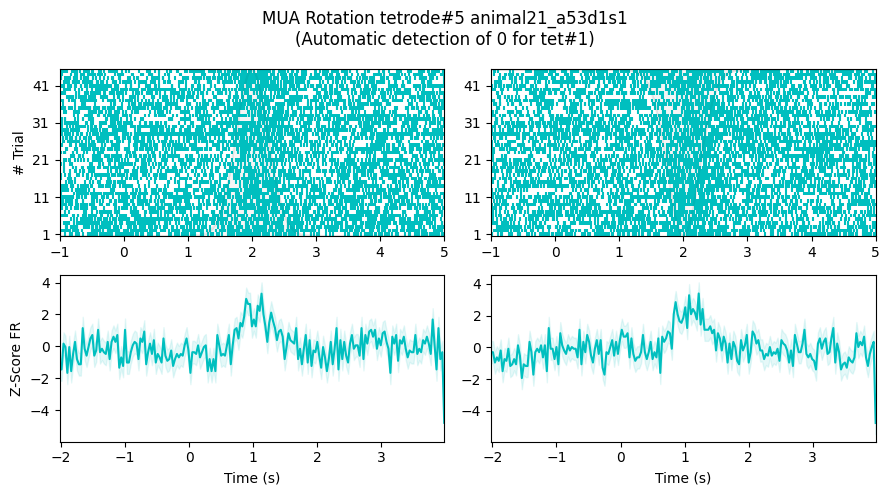

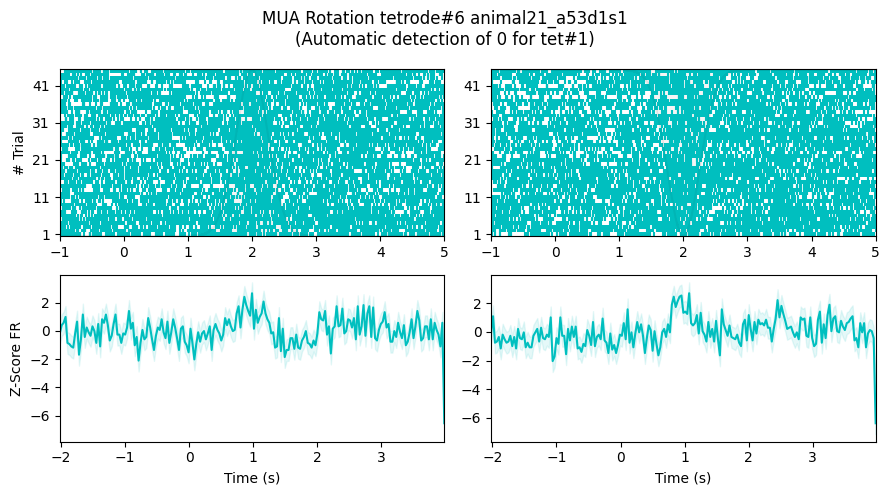

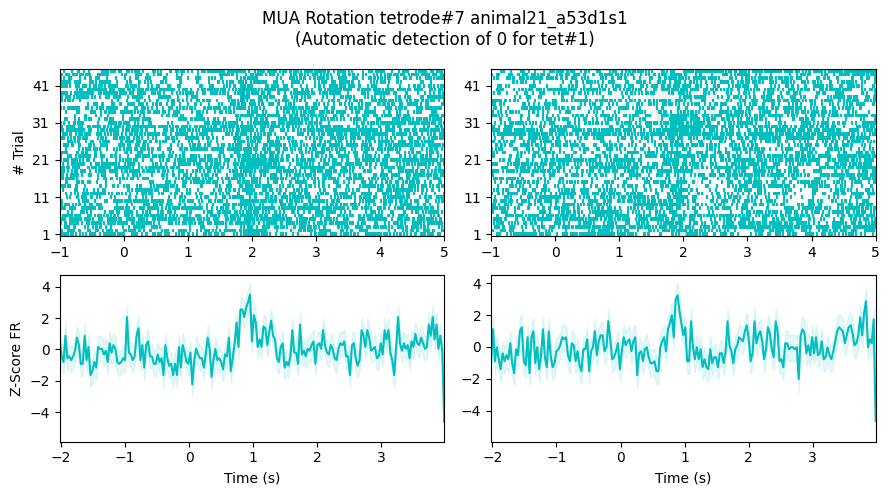

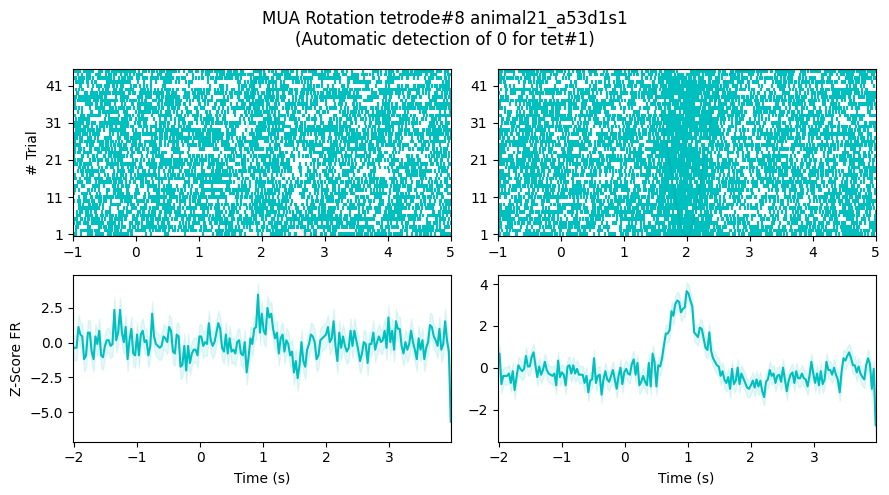

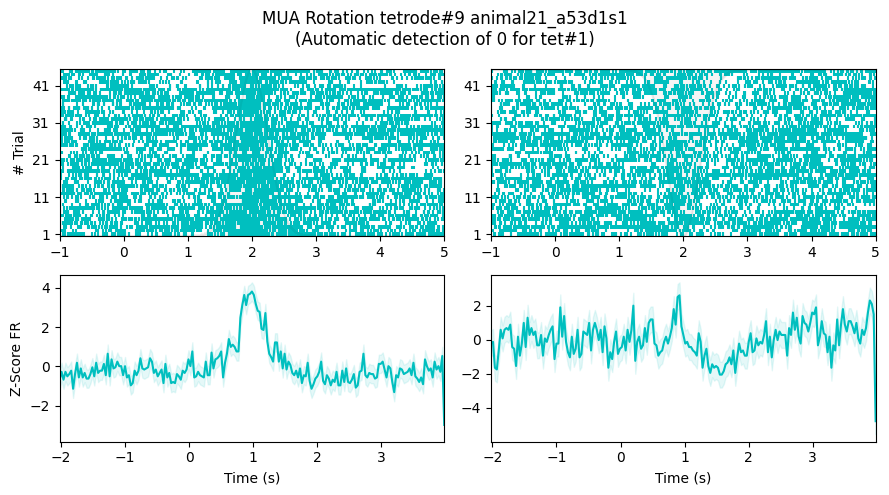

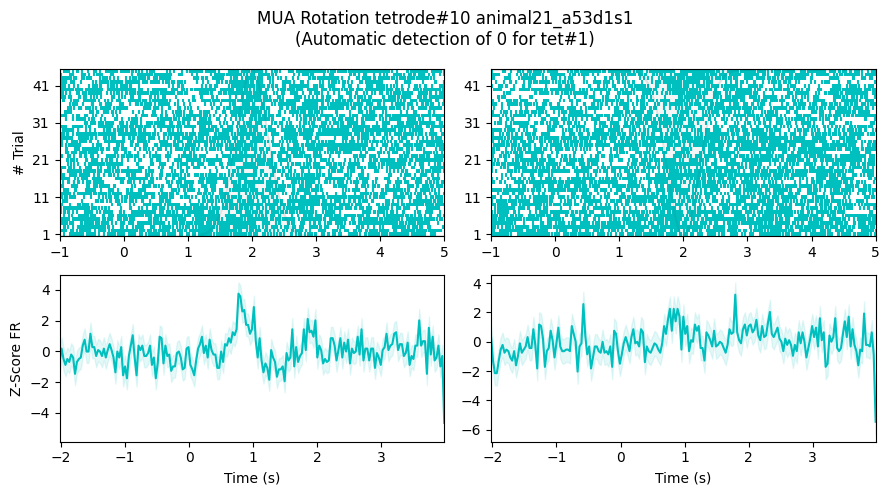

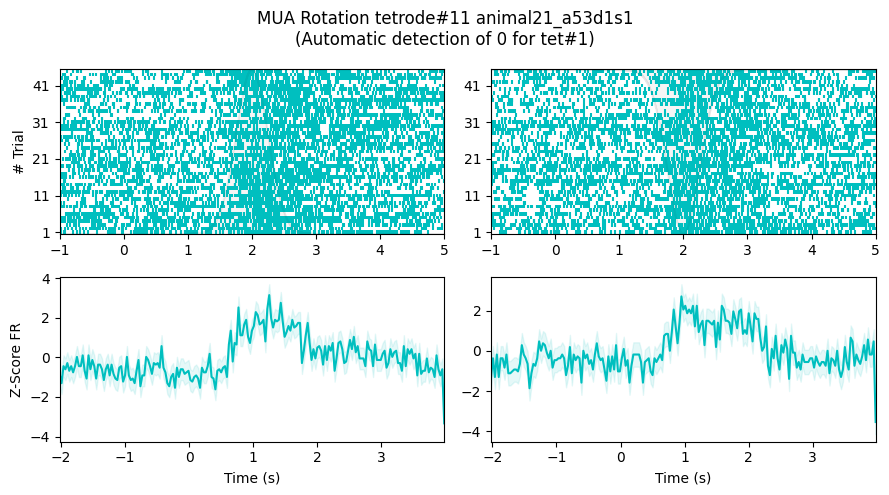

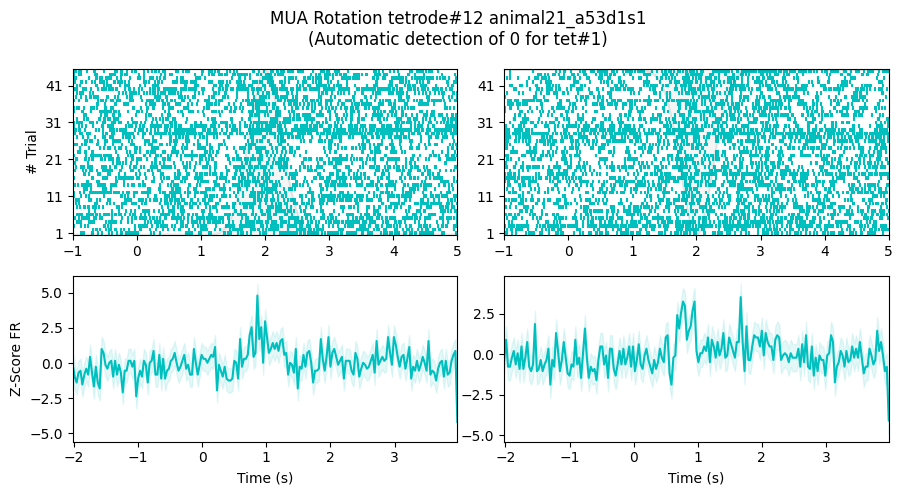

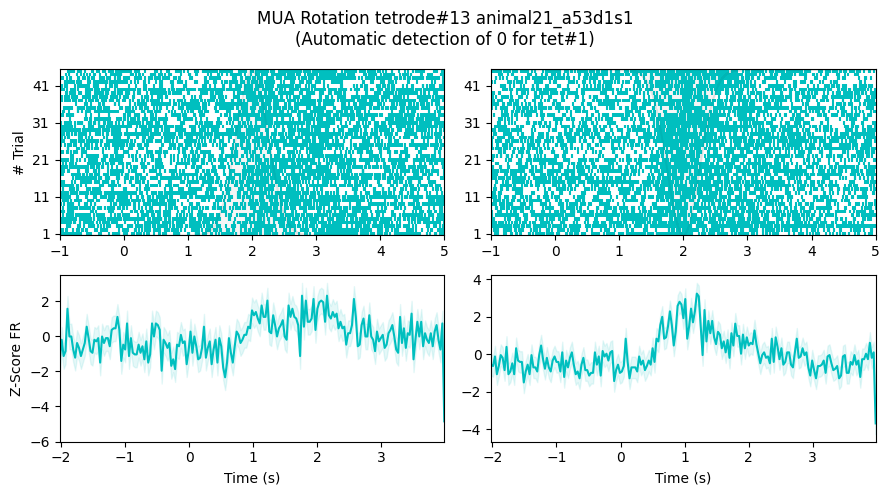

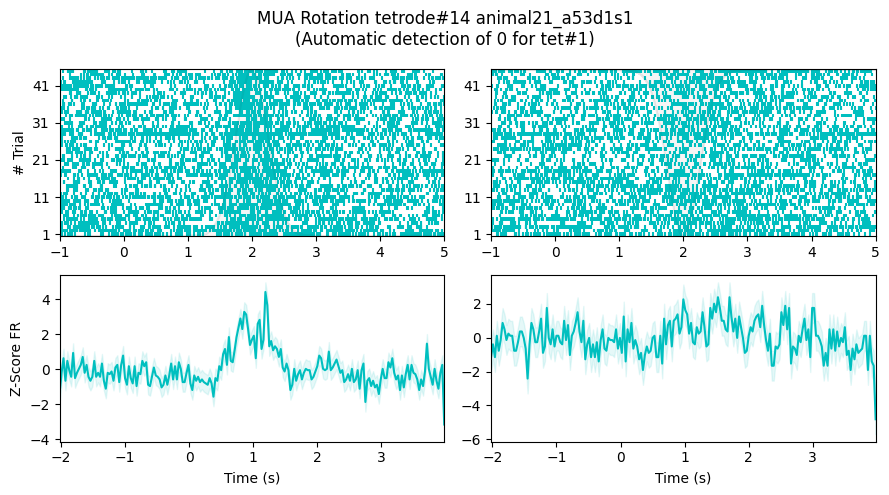

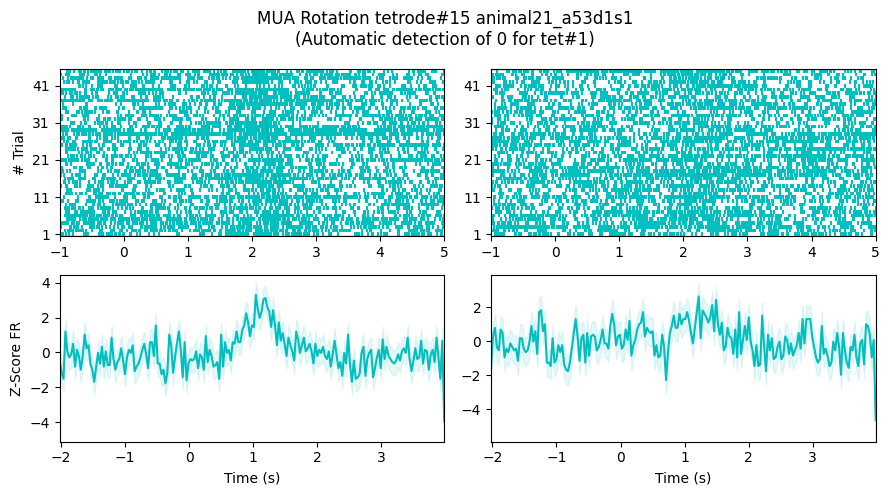

In [277]:
MUA_saving_folder = os.path.join(saving_folder, 'MUA', exp_id)
os.makedirs(MUA_saving_folder, exist_ok=True)

condition = 'first'
for tet in range(Ntet):
        spikeobject = np.concatenate([SpikeTimesMUA[condition]['CW'][tet], SpikeTimesMUA[condition]['CCW'][tet], SpikeTimesMUA[condition]['NotResponding'][tet]])
        plots_multiple_with_subplots(
                "plotRaster(spikeobject, color='c', xlabel=False, show=False)",
                "plotPSTH(SpikeTimesMUA, condition, ['CW', 'CCW', 'NotResponding'], tet, color='c', show=False)",
                suptitle=f"MUA Phototagging tetrode#{tet} {exp_id}\n(Automatic detection of 0 for tet#{LP_ref})",
                save = Saving_boolean,
                filename = os.path.join(MUA_saving_folder,f"MUA_{exp_id}_phototagging_tet#{tet}.png"),
                ncols=1
        )

condition = 'second'
for tet in range(Ntet):
        plots_multiple_with_subplots(
                "plotRaster(SpikeTimesMUA[condition]['CW'][tet], color='c', xlabel=False, plotvelocity=True, velocitycolor='k', velocityalpha=0.05, show=False)",
                "plotRaster(SpikeTimesMUA[condition]['CCW'][tet], color='c', xlabel=False, plotvelocity=True, velocitycolor='k', velocityalpha=0.05, show=False, ylabel=False)",
                "plotPSTH(SpikeTimesMUA, condition, 'CW', tet, color='c', show=False)",
                "plotPSTH(SpikeTimesMUA, condition, 'CCW', tet, color='c', show=False, ylabel=False)",
                suptitle=f"MUA Rotation tetrode#{tet} {exp_id}\n(Automatic detection of 0 for tet#{LP_ref})",
                save = Saving_boolean,
                filename = os.path.join(MUA_saving_folder,f"MUA_{exp_id}_rotation_tet#{tet}.png"),
                ncols=2
        )

# <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>SUA Analysis</strong></span>

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>All Spiking Times</strong></span>

In [71]:
## Spike times organized by cluster
AllSpikeTimes = np.empty((Nclust, Ntrial), dtype=object)


for unit in range(Nclust):
    spikingTimeClus = temp_time_clust[unit]

    for trial in range(Ntrial):
        upperTime = pic_position[trial] / f + timeAft
        lowerTime = pic_position[trial] / f - timeBef

        bornes = np.logical_and(lowerTime < spikingTimeClus, spikingTimeClus < upperTime)

        AllSpikeTimes[unit][trial] = spikingTimeClus[bornes] - lowerTime - timeBef

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Spiking times according to condition</strong></span>

In [72]:
SpikeTimes = {
    'first': {
        'CW': [[] for _ in range(Nclust)],
        'CCW': [[] for _ in range(Nclust)],
        'NotResponding': [[] for _ in range(Nclust)]
    },
    'second': {
        'CW': [[] for _ in range(Nclust)],
        'CCW': [[] for _ in range(Nclust)],
        'NotResponding': [[] for _ in range(Nclust)]
    }
}


for neuron in range(len(AllSpikeTimes)):
    for trial in range(Ntrial):
        condition = 'first' if trial < thresholdTrial else 'second'
        trialIndex = trial if trial < thresholdTrial else trial - thresholdTrial

        if RotationWise[condition][trialIndex] == 'CW':
            direction = 'CW'
        elif RotationWise[condition][trialIndex] == 'CCW':
            direction = 'CCW'
        else:
            direction = 'NotResponding'
        
        SpikeTimes[condition][direction][neuron].append([AllSpikeTimes[neuron][trial]])


for condition in SpikeTimes:
    for direction in SpikeTimes[condition]:
        for unit in range(len(SpikeTimes[condition][direction])):
            SpikeTimes[condition][direction][unit] = np.array([SpikeTimes[condition][direction][unit][trial][0] for trial in range(len(SpikeTimes[condition][direction][unit]))], dtype=object)

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Raster plots</strong></span>

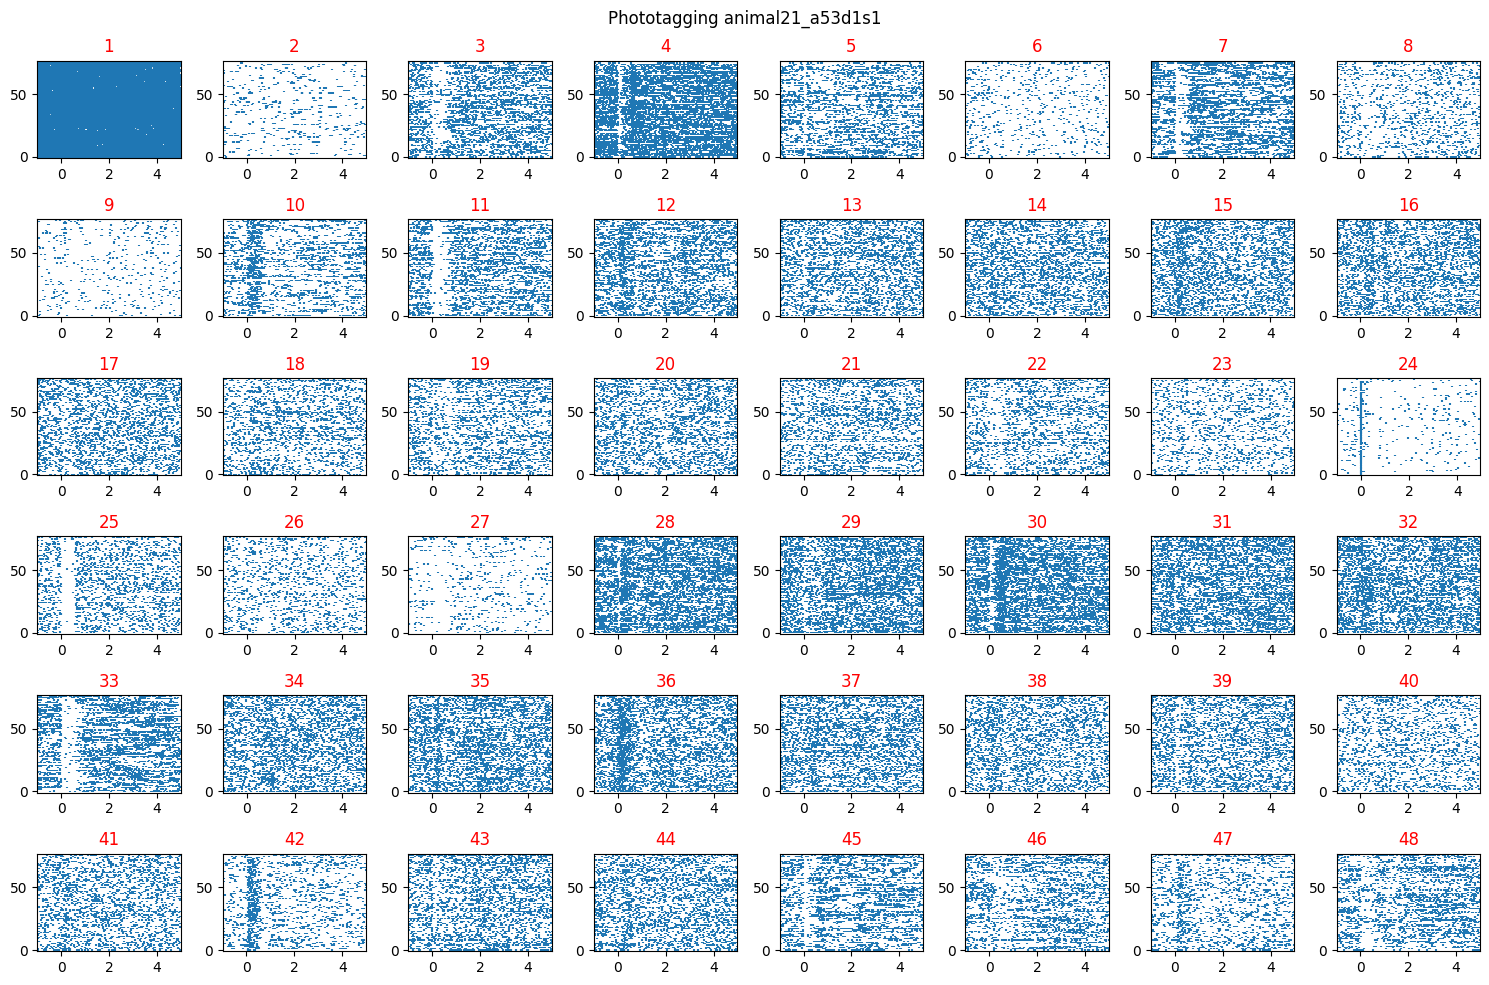

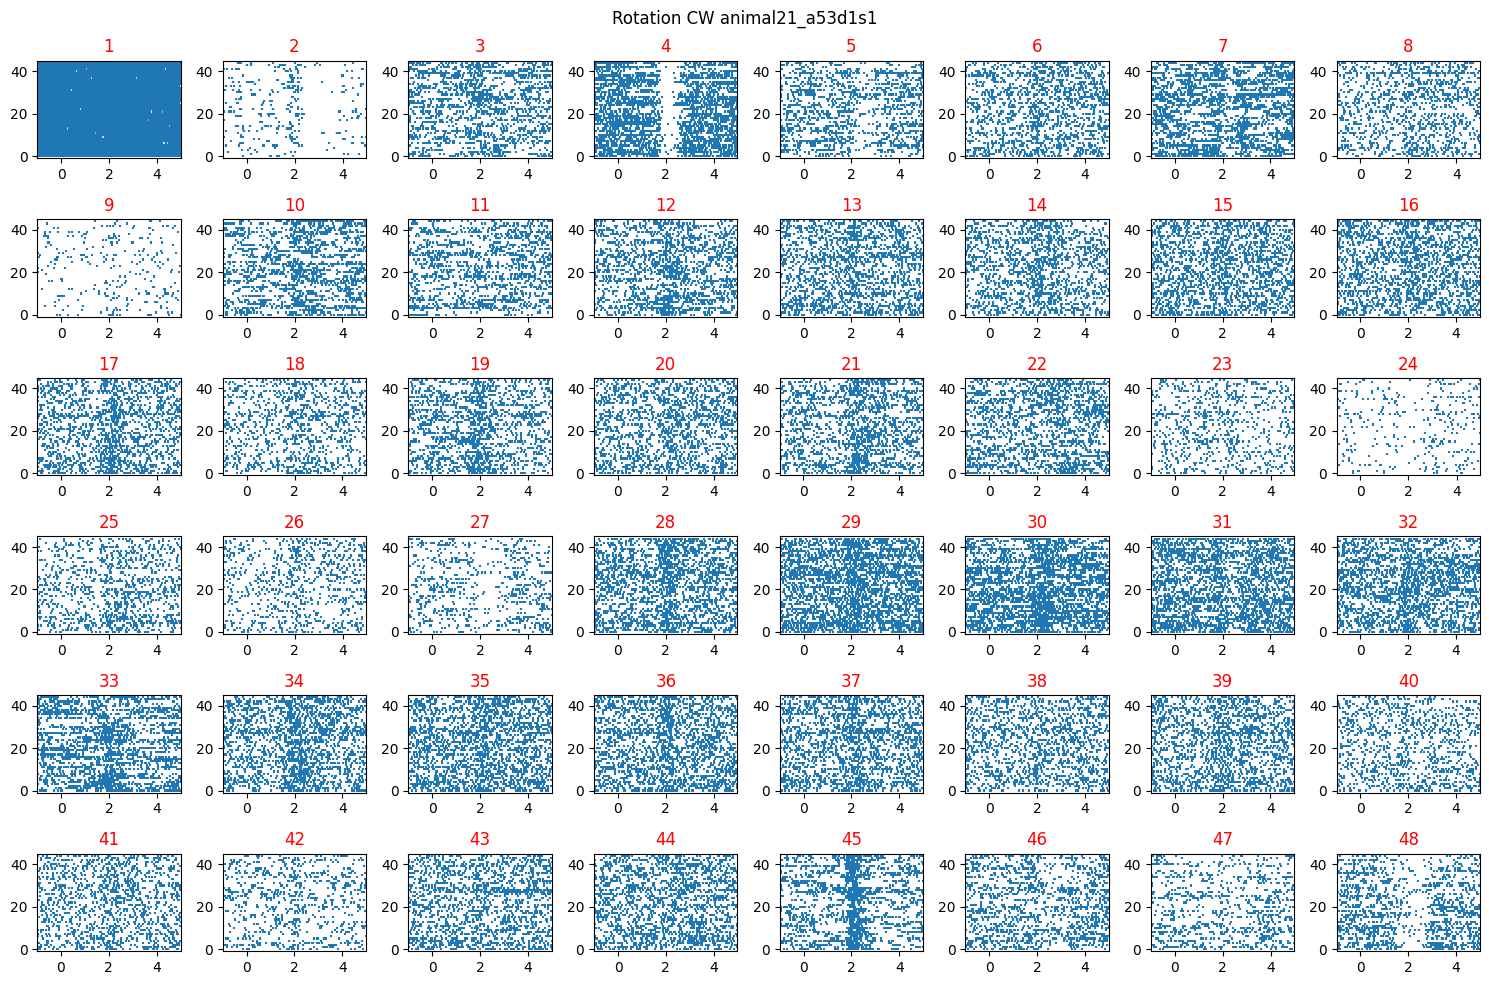

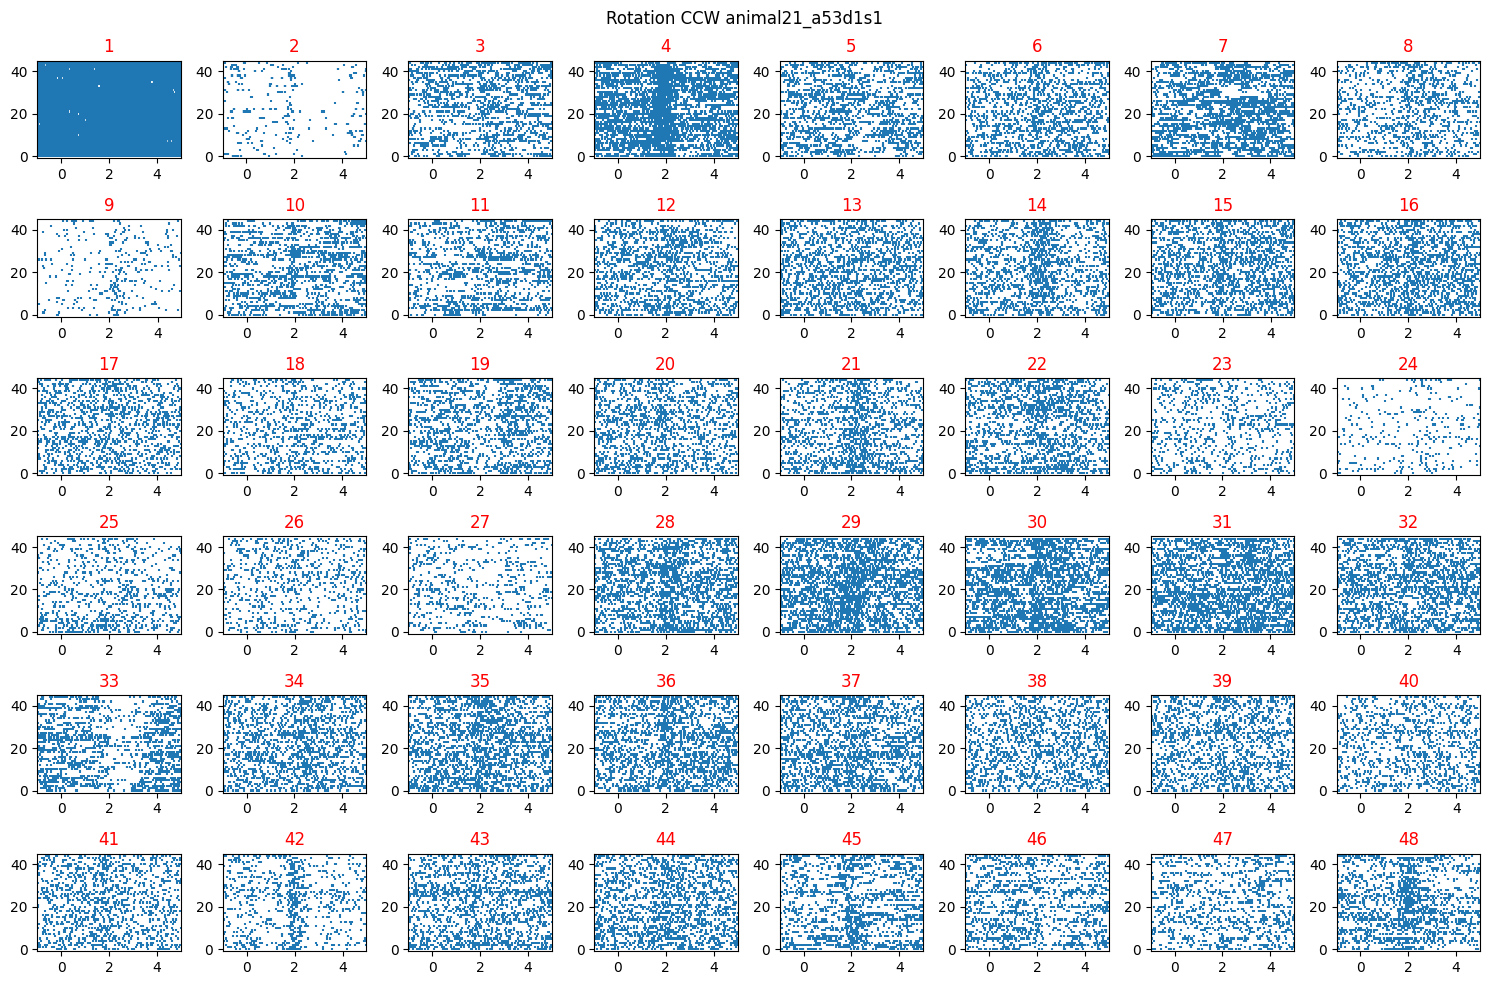

In [74]:
Raster_saving_folder = os.path.join(saving_folder, 'Raster', exp_id)
os.makedirs(Raster_saving_folder, exist_ok=True)

All_raster_saving_folder = os.path.join(saving_folder, 'Raster', exp_id, 'All')
for direction in ['CW', 'CCW', 'NotResponding', 'phototagging']:
    os.makedirs(os.path.join(All_raster_saving_folder, direction), exist_ok=True)


for condition in ['first']:
    size = Nclust
    n_row = int(size**0.5) ; n_col = (size + n_row - 1) // n_row  

    fig, axes = plt.subplots(n_row, n_col, figsize=(15, 10))
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < size:
            ax.eventplot(np.concatenate([SpikeTimes[condition][direction][i] for direction in ['CW', 'CCW', 'NotResponding']]))
            ax.set_title(i+1, color='red') ; ax.margins(0) ; ax.grid(False)# ; ax.axis('off')
        else:
            ax.axis('off')

    element = f"Rotation {direction}" if condition == 'second' else "Phototagging"
    plt.suptitle(f"{element} {exp_id}")

    plt.tight_layout()

    if Saving_boolean:
        filename=os.path.join(Raster_saving_folder, f"Raster_{exp_id}_phototagging.png")
        plt.savefig(filename, bbox_inches='tight')
    plt.show() ; print('\n')

for condition in ['second']:
    for direction in ['CW', 'CCW']:
        size = len(SpikeTimes[condition][direction])
        n_row = int(size**0.5) ; n_col = (size + n_row - 1) // n_row  

        fig, axes = plt.subplots(n_row, n_col, figsize=(15, 10))
        axes = axes.flatten()

        for i, ax in enumerate(axes):
            if i < size:
                ax.eventplot(SpikeTimes[condition][direction][i])
                ax.set_title(i+1, color='red') ; ax.margins(0) ; ax.grid(False) # ; ax.axis('off')
            else:
                ax.axis('off')

        element = f"Rotation {direction}" if condition == 'second' else "Phototagging"
        plt.suptitle(f"{element} {exp_id}")

        plt.tight_layout()

        if Saving_boolean:
            filename=os.path.join(Raster_saving_folder, f"Raster_{exp_id}_{direction}.png")
            plt.savefig(filename, bbox_inches='tight')
        plt.show() ; print('\n')


condition = 'first'
for neuron in range(Nclust):
    plotRaster(np.concatenate((SpikeTimes[condition]['CW'][neuron],SpikeTimes[condition]['CCW'][neuron],SpikeTimes[condition]['NotResponding'][neuron])), 'k', show=False, title=f"Phototagging, unit#{neuron}", save=True, filename=os.path.join(All_raster_saving_folder, "phototagging", f"unit#{neuron}.png"))

condition = 'second'
for direction in SpikeTimes[condition]:
    for neuron in range(Nclust):
            plotRaster(SpikeTimes[condition][direction][neuron], 'k', show=False, title=f"{direction}, unit#{neuron}", save=True, filename=os.path.join(All_raster_saving_folder, direction, f"unit#{neuron}.png"), plotvelocity=True, velocitycolor='c', velocityalpha=0.1)

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>PSTH</strong></span>

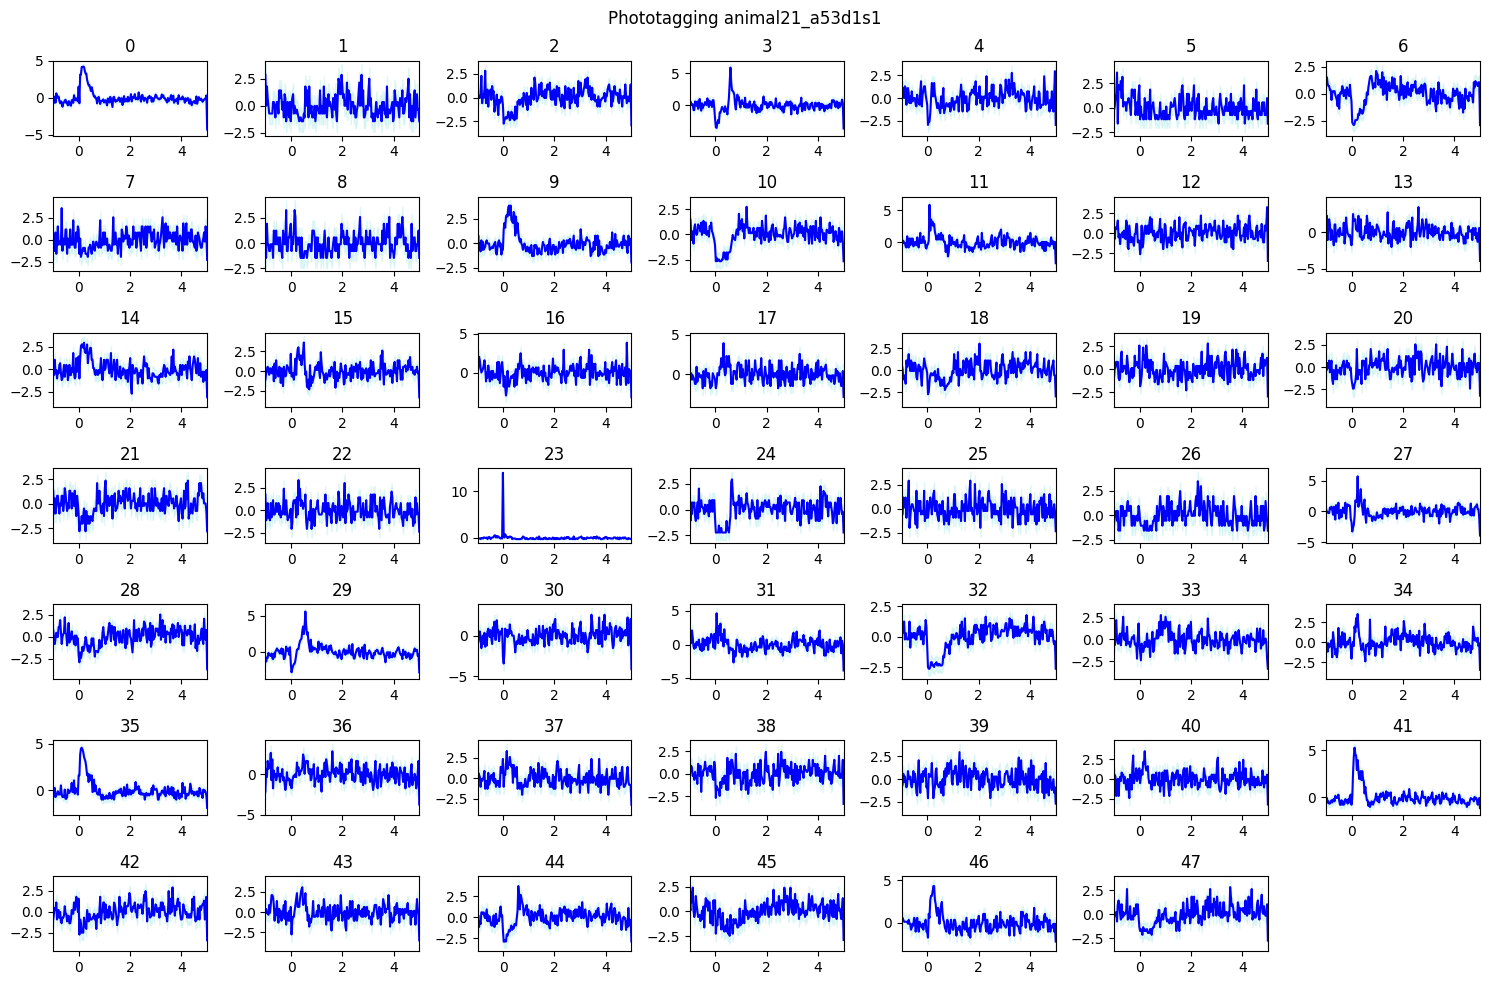

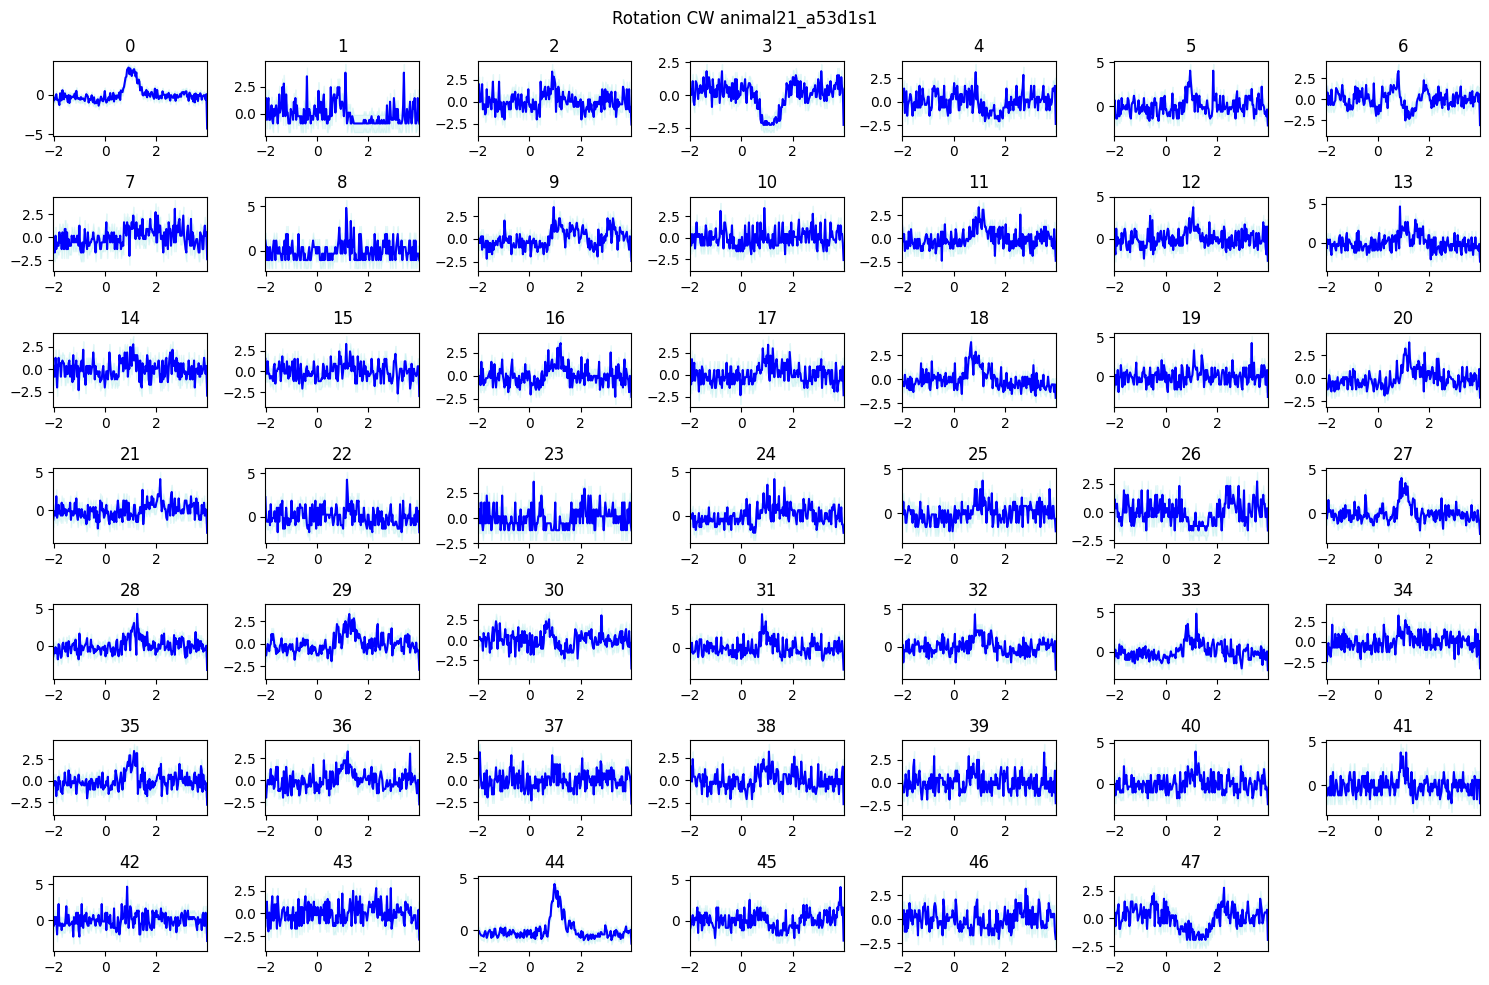

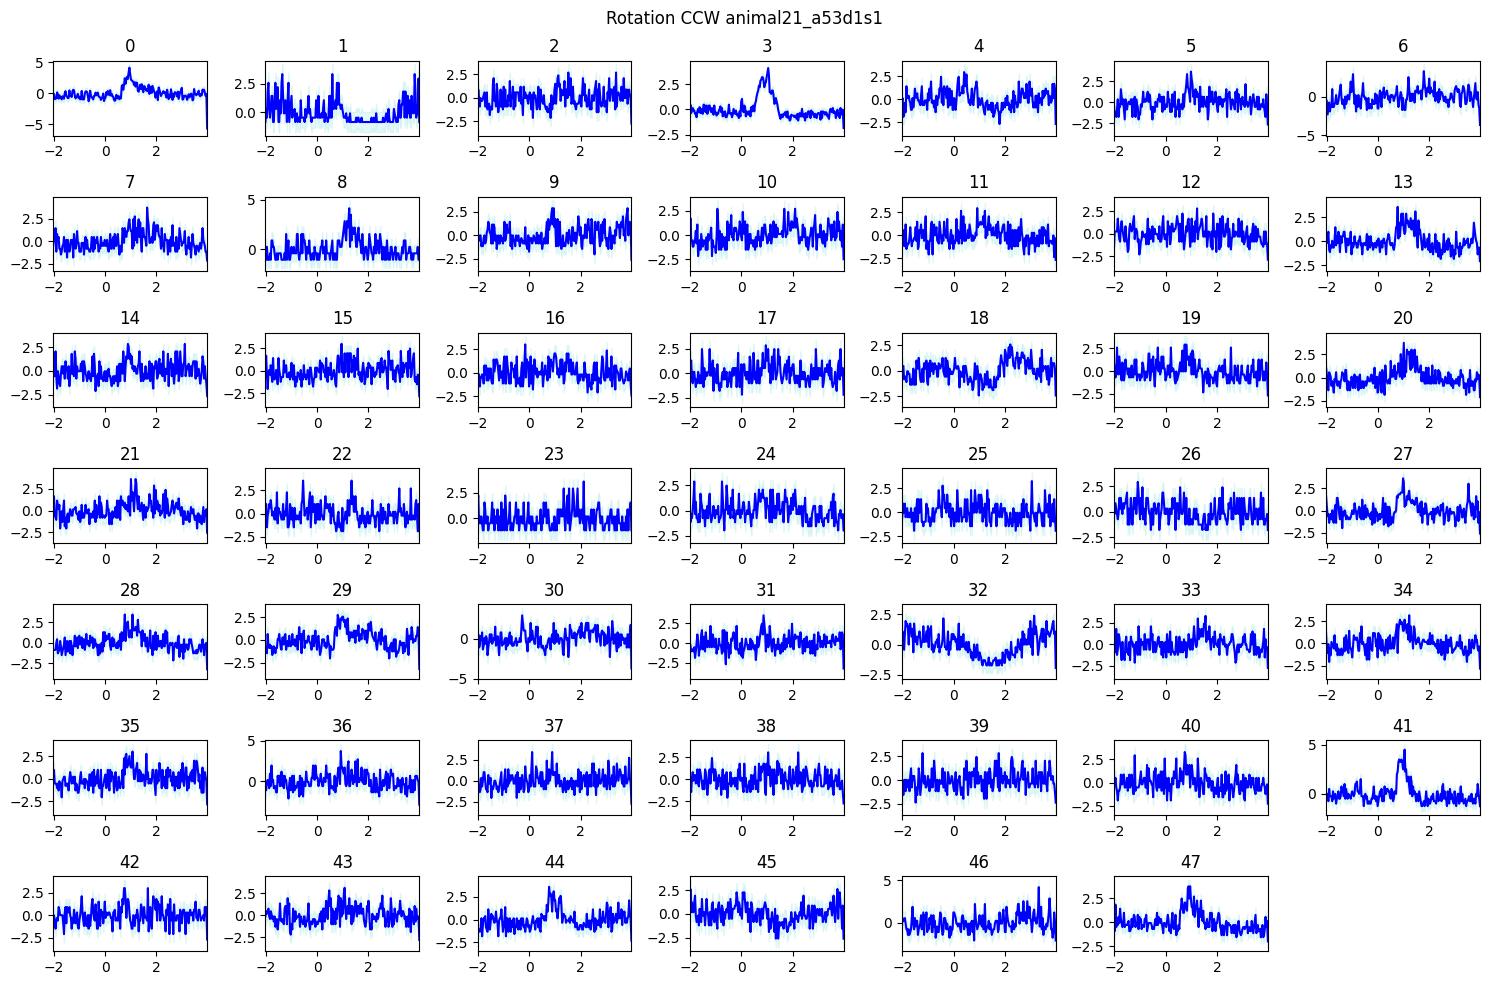

In [257]:
PSTH_saving_folder = os.path.join(saving_folder, 'PSTH', exp_id)
os.makedirs(PSTH_saving_folder, exist_ok=True)

All_PSTH_saving_folder = os.path.join(saving_folder, 'PSTH', exp_id, 'All')
for direction in ['CW', 'CCW', 'NotResponding', 'phototagging']:
    os.makedirs(os.path.join(All_PSTH_saving_folder, direction), exist_ok=True)


for condition in ['first']:
    element = f"Rotation {direction}" if condition == 'second' else "Phototagging"
    plots_multiple_with_subplots(
        *[f"plotPSTH(SpikeTimes, '{condition}', ['CW', 'CCW', 'NotResponding'], {unit}, show=False, xlabel=False, ylabel=False, title='{unit}', color='blue')" for unit in range(Nclust)],
        suptitle=f"{element} {exp_id}",
        save=Saving_boolean,
        filename=os.path.join(PSTH_saving_folder, f"PSTH_{exp_id}_phototagging.png"),
        size=(15,10)
    )

for condition in ['second']:
    for direction in ['CW', 'CCW']:
        number = len(SpikeTimes[condition][direction])
        element = f"Rotation {direction}" if condition == 'second' else "Phototagging"
        plots_multiple_with_subplots(
            *[f"plotPSTH(SpikeTimes, '{condition}', '{direction}', {unit}, show=False, xlabel=False, ylabel=False, title='{unit}', color='blue')" for unit in range(number)],
            suptitle=f"{element} {exp_id}",
            save=Saving_boolean,
            filename=os.path.join(PSTH_saving_folder, f"PSTH_{exp_id}_{direction}.png"),
            size=(15,10)
        )



condition = 'first'
for neuron in range(Nclust):
    plotPSTH(SpikeTimes, condition, ['CW', 'CCW', 'NotResponding'], neuron,'k', 'k', show=False, title=f"Phototagging, unit#{neuron}", save=True, filename=os.path.join(All_PSTH_saving_folder, "phototagging", f"unit#{neuron}.png"))

condition = 'second'
for direction in SpikeTimes[condition]:
    for neuron in range(Nclust):
            plotPSTH(SpikeTimes, condition, direction, neuron, 'k', 'k', show=False, title=f"{direction}, unit#{neuron}", save=True, filename=os.path.join(All_PSTH_saving_folder, direction, f"unit#{neuron}.png"))

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Figure 1</strong></span>

TypeError: plotPSTH() missing 3 required positional arguments: 'condition', 'direction', and 'unit'

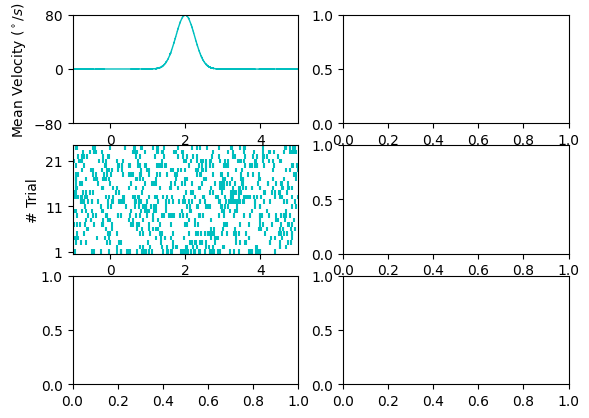

In [279]:
unit = 16

figure1(unit,duration, rotationSpeed, timeBef, timeAft)

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>PSTH Heatmap</strong></span>

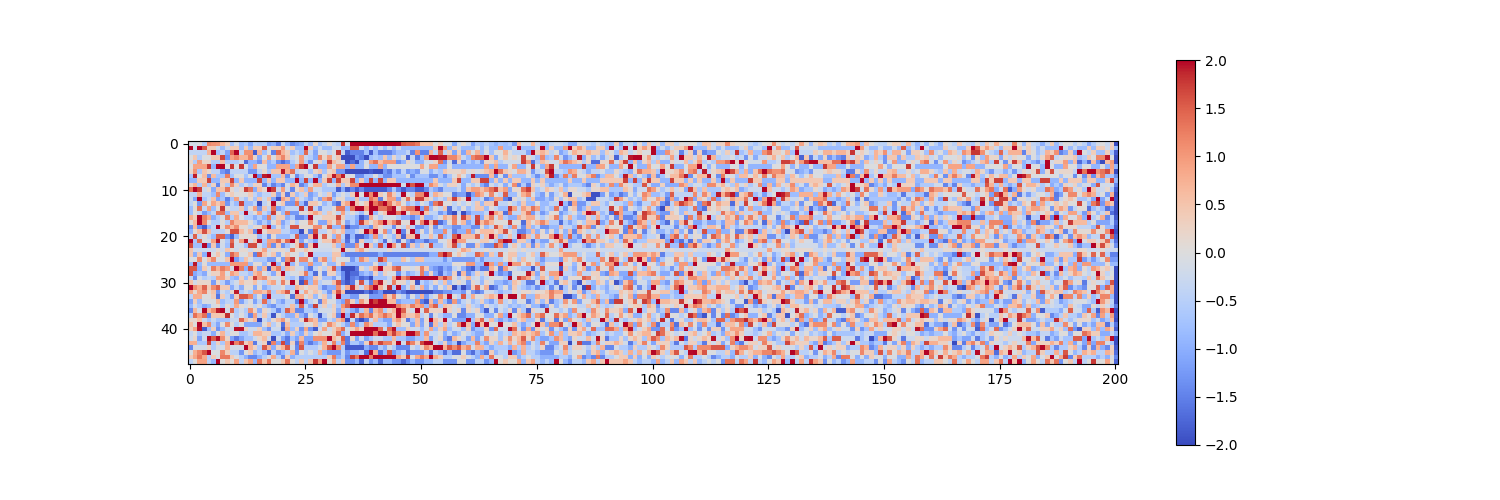

In [93]:
Zmaxiscore = [[] for _ in range(len(SpikeTimes['first']['CW']))]

for unit in range(len(SpikeTimes['first']['CW'])):
    StudiedSpikeTimes = SpikeTimes['first']['CW'][unit]

    color='k'
    shadedcolor='k'
    ylabel=True
    xlabel=True

    local_trial_number = len(StudiedSpikeTimes)

    binResolution=0.03

    spike_number_per_trial = [[] for _ in range(local_trial_number)]
    edges = []
    unitary_firing_rate = [[] for _ in range(local_trial_number)]

    for trial in range(local_trial_number):
        spike_number_per_trial[trial], edges = np.histogram(StudiedSpikeTimes[trial], bins=np.arange(-timeBef, timeAft + binResolution, binResolution))

    frequency_per_trial = [[spike_number_per_trial[trial][bin]/binResolution for bin in range(len(edges)-1)] for trial in range(local_trial_number)]
    mean_frequency = [np.mean([frequency_per_trial[trial][bin] for trial in range(local_trial_number)]) for bin in range(len(edges)-1)]

    Zscore = (mean_frequency - np.mean(mean_frequency)) / np.std(mean_frequency)
    Zunitary = (frequency_per_trial - np.mean(mean_frequency)) / np.std(mean_frequency)
    SEM = np.std(Zunitary)/np.sqrt(len(Zunitary))

    # # plt.figure(figsize=(15,6))
    # plt.plot(edges[:-1], Zscore, color=color)
    # plt.fill_between(edges[:-1], Zscore-SEM, Zscore+SEM, alpha=0.1, color=shadedcolor)
    # plt.xlim(-timeBef,timeAft)
    # if ylabel:
    #     plt.ylabel('PSTH')
    # if xlabel:
    #     plt.xlabel('Time (s)')
    # plt.show()

    Zmaxiscore[unit] = Zscore



# del Zmaxiscore[22]


# # Créer des données aléatoires pour le heatmap (une matrice 10x10)
# data = np.random.rand(10, 100)

# Afficher le heatmap
plt.figure(figsize=(15, 5))
plt.imshow(Zmaxiscore, cmap='coolwarm', interpolation='nearest', vmin=-2,vmax=2)
plt.colorbar()  # Ajouter une barre de couleur pour référence
# plt.xticks(duration)
plt.show()

## <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Statistics</strong></span>

### <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Spike counting</strong></span>

In [76]:
foo = np.diff(din['02'])
ddin02 = np.insert(foo, 0, 0)

peaks_photo = np.where(ddin02 == 1)[0]
pic_position_photo = np.array([peaks_photo[0]])

thresholdTime = np.where(ddin02 == -1)[0][0] - np.where(ddin02 == 1)[0][0] + 1 * f

for i in range(len(peaks_photo) - 1, 0, -1):
    if peaks_photo[i] - peaks_photo[i - 1] > thresholdTime:
        pic_position_photo = np.append(pic_position_photo, peaks_photo[i])

pic_position_photo = np.sort(pic_position_photo)

Ntrial_photo = len(pic_position_photo)

print("Number of trials :", Ntrial_photo)

print(pic_position_photo)

print(pic_position[0:len(pic_position_photo)]-pic_position_photo)


Number of trials : 75
[ 1264745  1508951  1753658  1998366  2242572  2487278  2731485  2975692
  3219899  3463604  3708311  3952518  4197225  4441431  4685637  4928843
  5173049  5416755  5660962  5904668  6148875  6393081  6637287  6881494
  7125200  7369407  7613113  7856818  8100525  8344731  8588938  8833145
  9076850  9321056  9565762  9810471 10054676 10298883 10542590 10786796
 11031001 11274708 11518415 11762621 12006327 12250534 12495240 12739948
 12984154 13228360 13472066 13716272 13960479 14204186 14448391 14692598
 14936805 15180511 15424717 15669423 15913630 16158338 16402543 16646249
 16889956 17134162 17377869 17622074 17865780 18109987 18354192 18598399
 18842607 19086312 19330519]
[ -23  -23  -23  -24  -23  -22  -23  -23  -24  -23  -23  -23  -23  -23
  -23  -23  -23  -22  -23  -23  -24  -23  -22  -23  -23  -24  -23  -22
  -23  -22  -23  -24  -23  -23  -21 -524  -22  -23  -23  -23  -22  -22
  -23  -23  -23  -23 -523  -24  -23  -23  -23  -23  -23  -24  -22  -23
  -23  -

In [77]:
numberBef, numberDur, diffBefDur, sumBefDur = ({
    'first': {
        'CW': [[] for _ in range(len(SpikeTimes['first']['CW']))],
        'CCW': [[] for _ in range(len(SpikeTimes['first']['CCW']))],
        'NotResponding': [[] for _ in range(len(SpikeTimes['first']['NotResponding']))]
    },
    'second': {
        'CW': [[] for _ in range(len(SpikeTimes['second']['CW']))],
        'CCW': [[] for _ in range(len(SpikeTimes['second']['CCW']))],
        'NotResponding': [[] for _ in range(len(SpikeTimes['second']['NotResponding']))]
    }
} for _ in range(4))

vMI = {
    # 'first': {
    #     'CW': [[] for _ in range(len(SpikeTimes['first']['CW']))],
    #     'CCW': [[] for _ in range(len(SpikeTimes['first']['CCW']))],
    #     'NotResponding': [[] for _ in range(len(SpikeTimes['first']['NotResponding']))]
    # },
    'second': {
        'CW': [[] for _ in range(len(SpikeTimes['second']['CW']))],
        'CCW': [[] for _ in range(len(SpikeTimes['second']['CCW']))],
        'NotResponding': [[] for _ in range(len(SpikeTimes['second']['NotResponding']))]
    }
}
dirMI = {
    # 'first': [[] for _ in range(Nclust)],
    'second': [[] for _ in range(Nclust)]
}


for condition in SpikeTimes:

    if condition == 'second':
        windowDurArray = np.where(abs(MeanRotation[condition]['CW'])>40)
        windowDur = [windowDurArray[0][0],windowDurArray[0][-1]]
        windowLen = len(windowDurArray[0])
        windowBef = [1*f, 1*f+windowLen]
    elif condition == 'first':
        photo_position = timeBef*f + pic_position[0:len(pic_position_photo)] - pic_position_photo
        windowDurArray = [photo_position, photo_position + int(0.003*f)]
        windowBefArray = [photo_position - int(0.004*f), photo_position - int(0.001*f)]

    for direction in SpikeTimes[condition]:

        for unit in range(len(SpikeTimes[condition][direction])):
            for trial in range(len(SpikeTimes[condition][direction][unit])):

                if condition == 'first':
                    windowBef = [windowBefArray[0][trial], windowBefArray[1][trial]]
                    windowDur = [windowDurArray[0][trial], windowDurArray[1][trial]]

                lowerBef = SpikeTimes[condition][direction][unit][trial] > duration[windowBef[0]]
                upperBef = SpikeTimes[condition][direction][unit][trial] < duration[windowBef[1]]
                lowerDur = SpikeTimes[condition][direction][unit][trial] > duration[windowDur[0]]
                upperDur = SpikeTimes[condition][direction][unit][trial] < duration[windowDur[1]]

                numberBef[condition][direction][unit].append(np.count_nonzero(lowerBef & upperBef))
                numberDur[condition][direction][unit].append(np.count_nonzero(lowerDur & upperDur))

            diffBefDur[condition][direction][unit] = np.mean(numberDur[condition][direction][unit]) - np.mean(numberBef[condition][direction][unit])
            sumBefDur[condition][direction][unit] = np.mean(numberDur[condition][direction][unit]) + np.mean(numberBef[condition][direction][unit])
            if condition == 'second':
                vMI[condition][direction][unit] = diffBefDur[condition][direction][unit] / sumBefDur[condition][direction][unit]
            

condition = 'second'
for unit in range(Nclust):
    meanCW = np.mean(numberDur[condition]['CW'][unit])
    meanCCW = np.mean(numberDur[condition]['CCW'][unit])
    dirMI[condition][unit] = (meanCW - meanCCW)/(meanCW + meanCCW)

### <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Paired Wilcoxon Test</strong></span>

In [78]:
statistics_vMI, p_values_vMI = ({
    'first': {
        'CW': [[] for _ in range(len(SpikeTimes['first']['CW']))],
        'CCW': [[] for _ in range(len(SpikeTimes['first']['CCW']))],
        'NotResponding': [[] for _ in range(len(SpikeTimes['first']['NotResponding']))]
    },
    'second': {
        'CW': [[] for _ in range(len(SpikeTimes['second']['CW']))],
        'CCW': [[] for _ in range(len(SpikeTimes['second']['CCW']))],
        'NotResponding': [[] for _ in range(len(SpikeTimes['second']['NotResponding']))]
    }
} for _ in range(2))

statistics_dirMI, p_values_dirMI = ({
    'first': [[] for _ in range(Nclust)],
    'second': [[] for _ in range(Nclust)]
} for _ in range(2))




for condition in SpikeTimes:
    for direction in SpikeTimes[condition]:
        for unit in range(len(SpikeTimes[condition][direction])):
            try:
                results_vMI = wilcoxon(numberBef[condition][direction][unit], numberDur[condition][direction][unit])
                statistics_vMI[condition][direction][unit].append(results_vMI[0])
                p_values_vMI[condition][direction][unit].append(results_vMI[1])
            except ValueError:
                statistics_vMI[condition][direction][unit].append(0)
                p_values_vMI[condition][direction][unit].append(1)

for condition in SpikeTimes:
    for unit in range(Nclust):
        try:
            results_dirMI = wilcoxon(numberDur[condition]['CW'][unit], numberDur[condition]['CCW'][unit])
            statistics_dirMI[condition][unit].append(results_dirMI[0])
            p_values_dirMI[condition][unit].append(results_dirMI[1])
        except ValueError:
            statistics_dirMI[condition][unit].append(0)
            p_values_dirMI[condition][unit].append(1)


C:\Users\gbouvier\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\gbouvier\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: Sample size too small for normal approximation.
  res = hypotest_fun_out(*samples, **kwds)


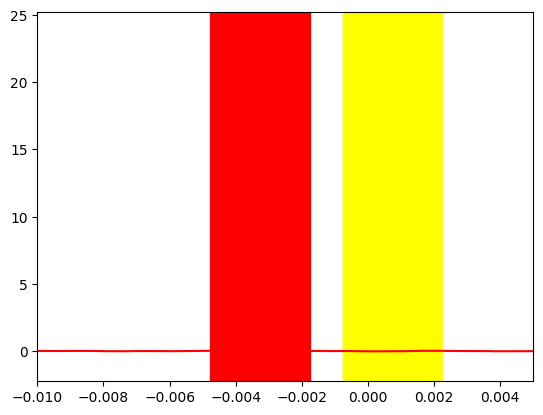

In [79]:
photo_position = timeBef*f + pic_position[0:len(pic_position_photo)] - pic_position_photo
windowDurArray = [photo_position, photo_position + int(0.003*f)]
windowBefArray = [photo_position - int(0.004*f), photo_position - int(0.001*f)]

windowBef = [windowBefArray[0][0], windowBefArray[1][0]]
windowDur = [windowDurArray[0][0], windowDurArray[1][0]]

plt.eventplot(SpikeTimes['first']['CCW'][2])
plt.plot(duration,MeanRotation['first']['CW']/80*20, color='r')
plt.axvspan(duration[windowBef[0]], duration[windowBef[1]], color='red')
plt.axvspan(duration[windowDur[0]], duration[windowDur[1]], color='yellow')

plt.xlim(-0.010, 0.005)
# plt.ylim(-0.5,20.5)
plt.show()

### <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Determination of significant units by condition & rotation</strong></span>

In [80]:
p_value_threshold = 0.05

significance_vMI = {
    'first': [],
    'second': {
        'CW': [],
        'CCW': [],
        'NotResponding': []
    }
}

significance_dirMI = {
    'first': [[] for _ in range(Nclust)],
    'second': [[] for _ in range(Nclust)]
}

# for condition in SpikeTimes:
condition = 'first'
significanceCW = np.where([p_values_vMI[condition]['CW'][neuron][0]<p_value_threshold for neuron in range(Nclust)])
significanceCCW = np.where([p_values_vMI[condition]['CCW'][neuron][0]<p_value_threshold for neuron in range(Nclust)])
significanceNR = np.where([p_values_vMI[condition]['NotResponding'][neuron][0]<p_value_threshold for neuron in range(Nclust)])
significance_vMI[condition] = np.array(sorted(list(set(significanceCW[0]) | set(significanceCCW[0]) | set(significanceNR[0]))))

condition = 'second'
for direction in SpikeTimes[condition]:
    significance_vMI[condition][direction] = np.where([p_values_vMI[condition][direction][neuron][0]<p_value_threshold for neuron in range(Nclust)])

for condition in SpikeTimes:
    for unit in range(Nclust):
        significance_dirMI[condition][unit] = p_values_dirMI[condition][unit][0]<p_value_threshold

### <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Visual Overview Of Spike Numbers Before & During</strong></span>

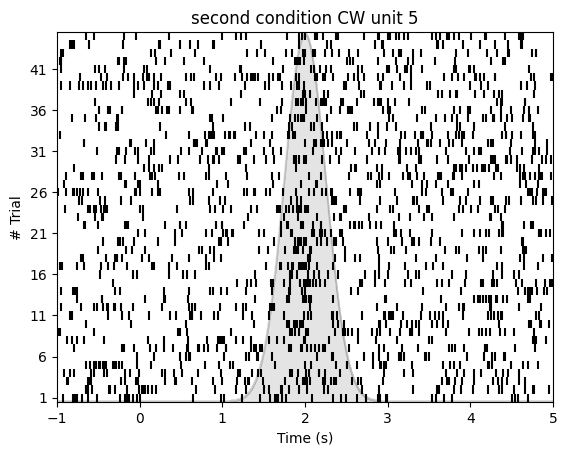

Number of spikes before rotation : [1, 6, 3, 4, 2, 3, 5, 3, 3, 1, 3, 1, 3, 1, 0, 3, 4, 3, 1, 2, 3, 4, 1, 2, 0, 5, 1, 5, 5, 3, 3, 2, 1, 1, 0, 6, 5, 4, 5, 6, 2, 3, 3, 3, 1]
Number of spikes during rotation : [3, 7, 10, 8, 2, 1, 11, 4, 6, 10, 4, 1, 8, 5, 13, 7, 11, 2, 7, 9, 8, 8, 3, 9, 3, 6, 3, 2, 1, 7, 2, 7, 6, 5, 9, 2, 11, 5, 5, 6, 5, 5, 7, 2, 7]
True


In [81]:
condition = 'second'
direction = 'CW'
unit = 5

plotRaster(SpikeTimes[condition][direction][unit], title=f"{condition} condition {direction} unit {unit}",plotvelocity=True)

print(f'Number of spikes before rotation : {numberBef[condition][direction][unit]}')
print(f'Number of spikes during rotation : {numberDur[condition][direction][unit]}')
print(len(numberBef[condition][direction][unit])==len(numberDur[condition][direction][unit]))

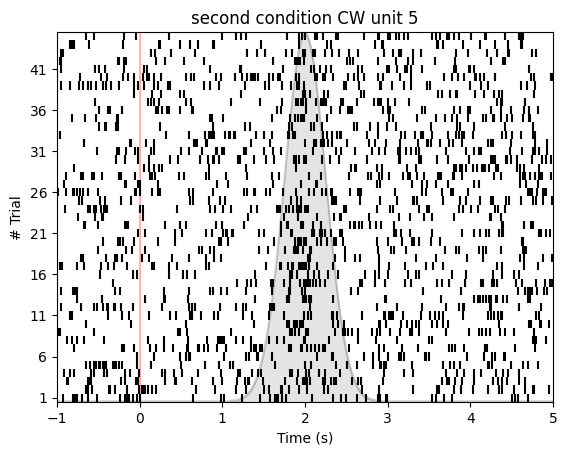

Number of spikes before rotation : [1, 6, 3, 4, 2, 3, 5, 3, 3, 1, 3, 1, 3, 1, 0, 3, 4, 3, 1, 2, 3, 4, 1, 2, 0, 5, 1, 5, 5, 3, 3, 2, 1, 1, 0, 6, 5, 4, 5, 6, 2, 3, 3, 3, 1]
Number of spikes during rotation : [3, 7, 10, 8, 2, 1, 11, 4, 6, 10, 4, 1, 8, 5, 13, 7, 11, 2, 7, 9, 8, 8, 3, 9, 3, 6, 3, 2, 1, 7, 2, 7, 6, 5, 9, 2, 11, 5, 5, 6, 5, 5, 7, 2, 7]
True


In [82]:
condition = 'second'
direction = 'CW'
unit = 5

plotRaster(SpikeTimes[condition][direction][unit], title=f"{condition} condition {direction} unit {unit}",plotvelocity=True,#
           extra=lambda: (#
               plt.axvspan(duration[windowBef[0]], duration[windowBef[1]], color='red', alpha=0.15),#
               plt.axvspan(duration[windowDur[0]], duration[windowDur[1]], color='red', alpha=0.15)#
               )#
               )

print(f'Number of spikes before rotation : {numberBef[condition][direction][unit]}')
print(f'Number of spikes during rotation : {numberDur[condition][direction][unit]}')
print(len(numberBef[condition][direction][unit])==len(numberDur[condition][direction][unit]))

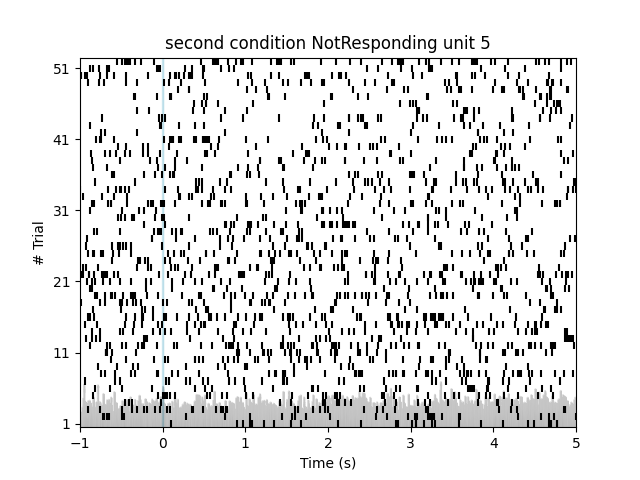

(array([36], dtype=int64),)
[1, 1, 5, 0, 6, 2, 7, 3, 1, 6, 0, 3, 1, 4, 5, 7, 3, 5, 3, 1, 4, 4, 4, 4, 6, 1, 2, 5, 1, 2, 0, 5, 5, 5, 3, 3, 3, 2, 4, 2, 14, 0, 3, 1, 2, 4, 5, 3, 4, 10, 4, 1]
[1, 2, 4, 6, 6, 3, 2, 1, 3, 6, 5, 8, 4, 3, 3, 3, 3, 2, 7, 1, 3, 1, 8, 2, 6, 5, 3, 0, 10, 2, 6, 2, 5, 1, 2, 1, 1, 6, 3, 4, 3, 2, 4, 4, 0, 1, 2, 0, 4, 7, 0, 3]


In [101]:
condition = 'second'
direction = 'NotResponding'
unit = 5

plotRaster(SpikeTimes[condition][direction][unit],title=f"{condition} condition {direction} unit {unit}",
            extra=lambda: (
                plt.axvspan(duration[windowBef[0]], duration[windowBef[1]], color='lightblue', alpha=0.5),
                plt.axvspan(duration[windowDur[0]], duration[windowDur[1]], color='lightblue', alpha=0.5)
            ),plotvelocity=True)

print(significance_vMI[condition][direction])

print(numberBef[condition][direction][unit])
print(numberDur[condition][direction][unit])

### <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Resuming Modulations & Preferences</strong></span>

In [102]:
modulation = {
    'first': [[] for _ in range(Nclust)],
    'second': [
        {
            'selectivity': [],
            'type': []
        } for _ in range(Nclust)]
}


for unit in range(Nclust):
    # for condition in significance:
    condition = 'first'
    modulation[condition][unit] = 1 if unit in significance_vMI[condition] else 0


    ##########################################
    condition = 'second'
    both = (unit in significance_vMI[condition]['CW'][0]) and (unit in significance_vMI[condition]['CCW'][0])
    CW = unit in significance_vMI[condition]['CW'][0]
    CCW = unit in significance_vMI[condition]['CCW'][0]



    if not (both or CW or CCW):
        modulation[condition][unit]['selectivity'] = 'unmodulated'
        modulation[condition][unit]['type'] = '0'
    else:
        if both:
            modulation[condition][unit]['selectivity'] = 'both'
            if (diffBefDur[condition]['CW'][unit] >= 0) and (diffBefDur[condition]['CCW'][unit] >= 0):
                modulation[condition][unit]['type'] = '+/+'
            elif (diffBefDur[condition]['CW'][unit] < 0) and (diffBefDur[condition]['CCW'][unit] < 0):
                modulation[condition][unit]['type'] = '-/-'
            elif (diffBefDur[condition]['CW'][unit] < 0) and (diffBefDur[condition]['CCW'][unit] >= 0):
                modulation[condition][unit]['type'] = '-/+'
            elif (diffBefDur[condition]['CW'][unit] >= 0) and (diffBefDur[condition]['CCW'][unit] < 0):
                modulation[condition][unit]['type'] = '+/-'
        elif CW:
            modulation[condition][unit]['selectivity'] = 'CW'
            modulation[condition][unit]['type'] = '+' if diffBefDur[condition]['CW'][unit] >= 0 else '-'
        elif CCW:
            modulation[condition][unit]['selectivity'] = 'CCW'
            modulation[condition][unit]['type'] = '+' if diffBefDur[condition]['CCW'][unit] >= 0 else '-'


# Convert lists -> NumPy
for condition in modulation:
    modulation[condition] = np.array(modulation[condition])

In [103]:
preference = {
    # 'first': [[] for _ in range(Nclust)],
    'second': [[] for _ in range(Nclust)]
}



for condition in ['second']:
    for unit in range(Nclust):
        if significance_dirMI[condition][unit]:
            preference[condition][unit] = 'CW' if dirMI[condition][unit]>0 else 'CCW'
        else:
            preference[condition][unit] = 'None'

The 0 modulated neurons are [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21 22 24 25 26
 27 28 29 30 31 32 33 34 36 37 38 39 41 42 43 44 46 47]


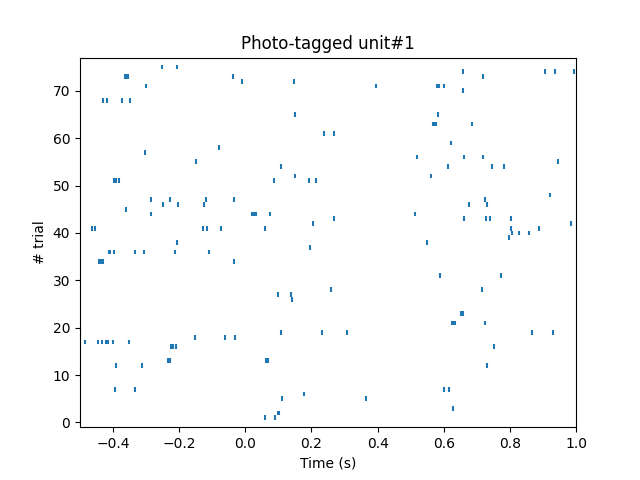

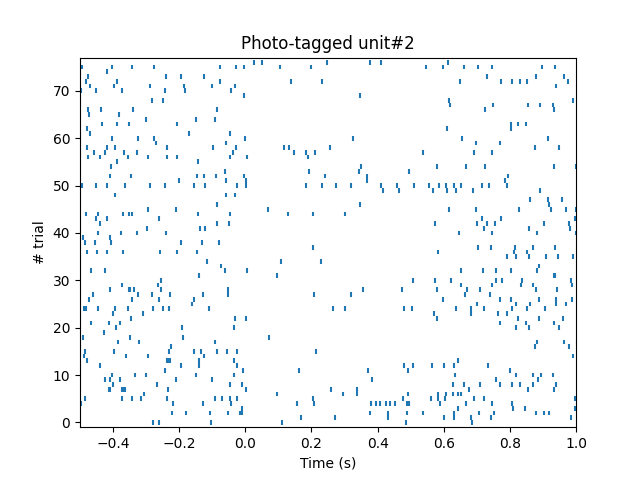

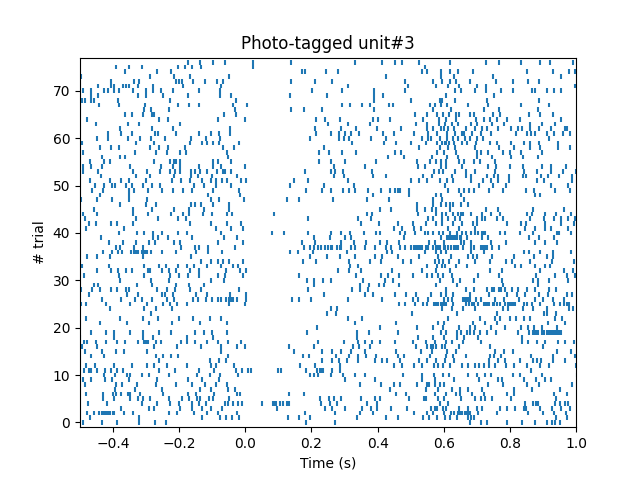

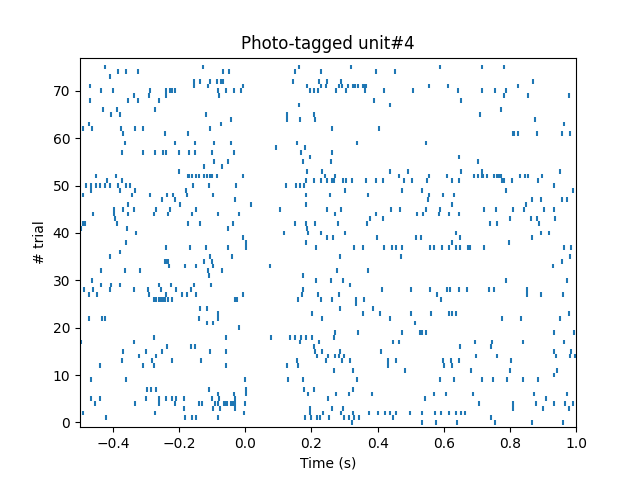

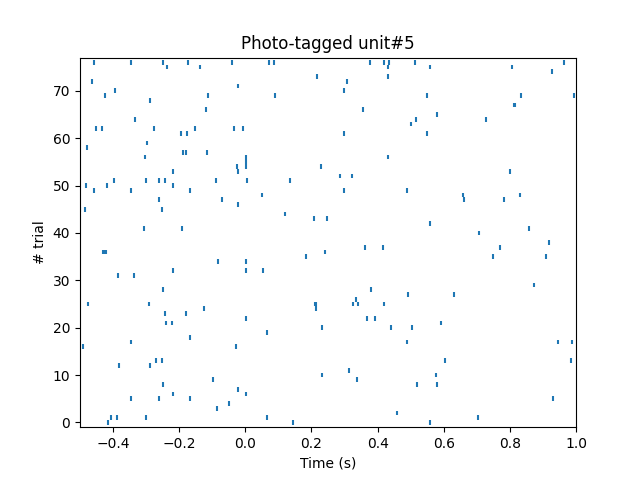

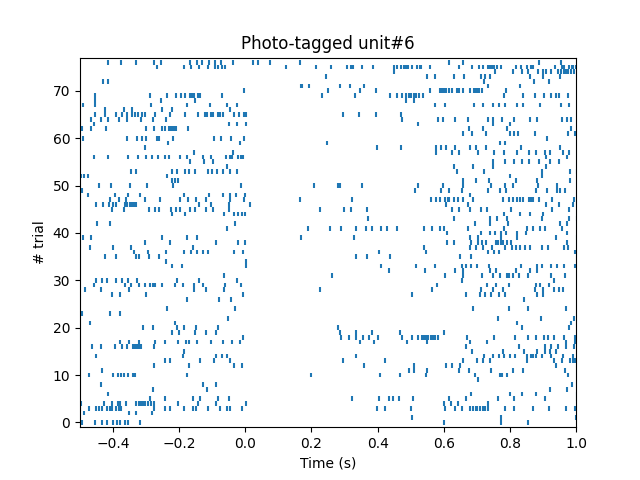

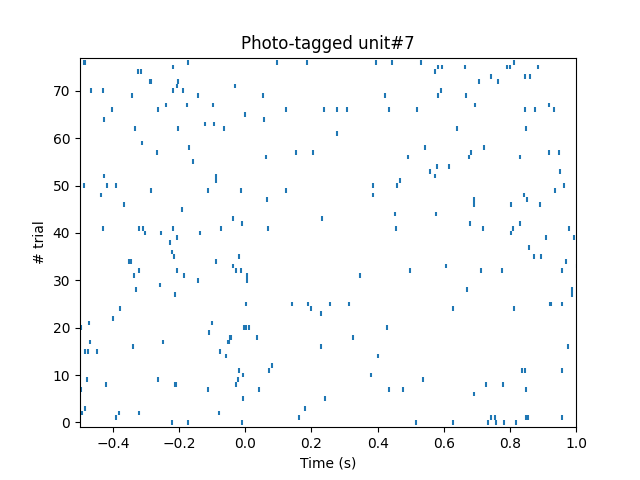

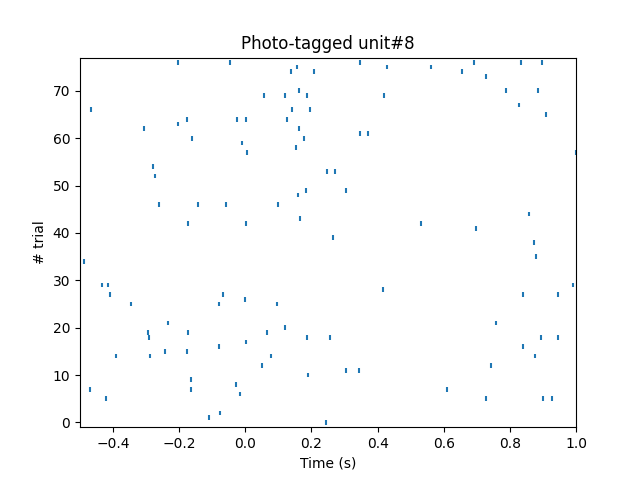

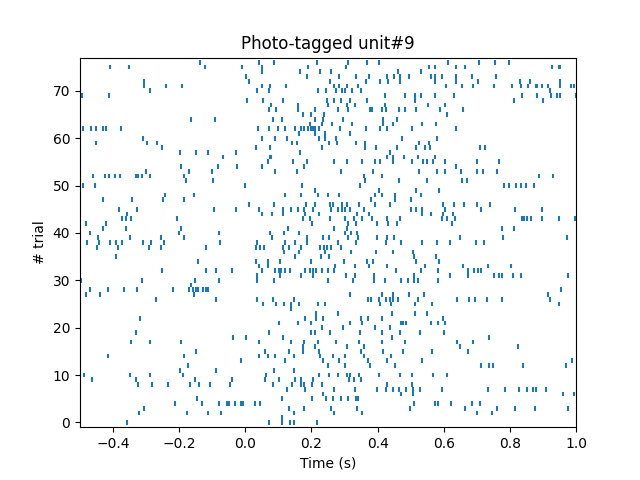

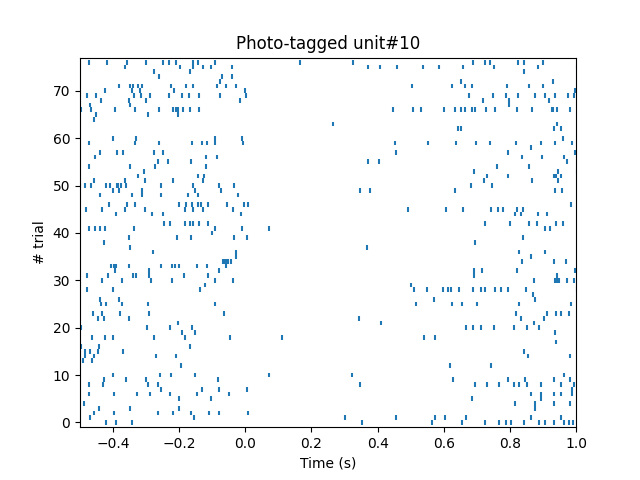

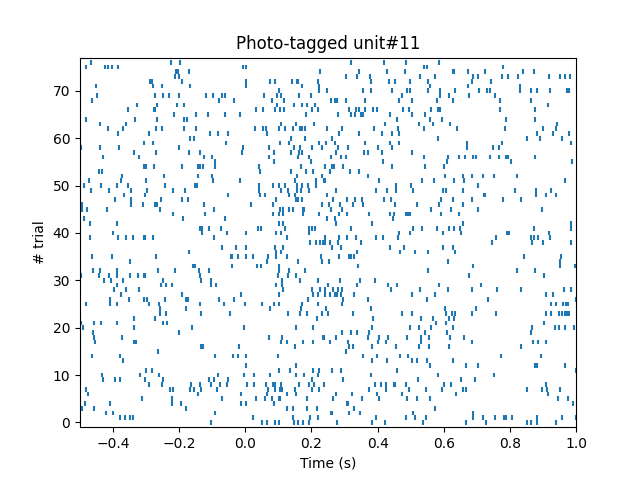

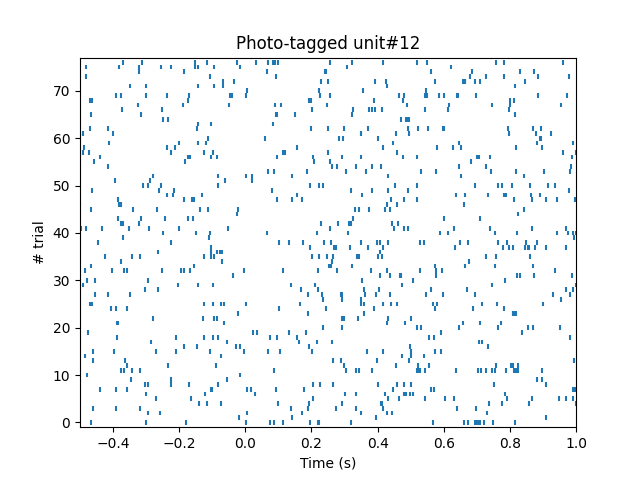

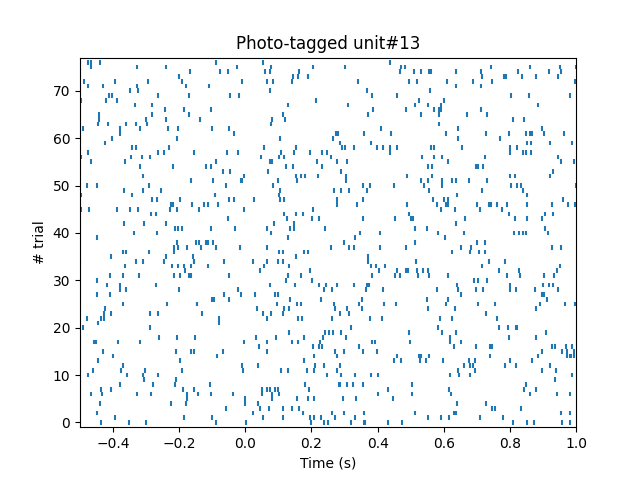

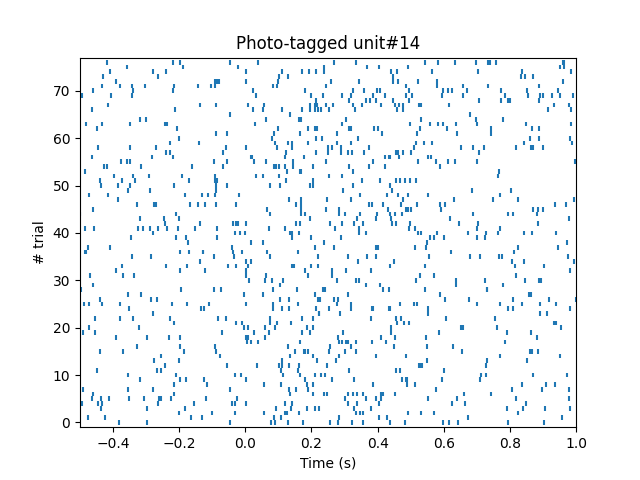

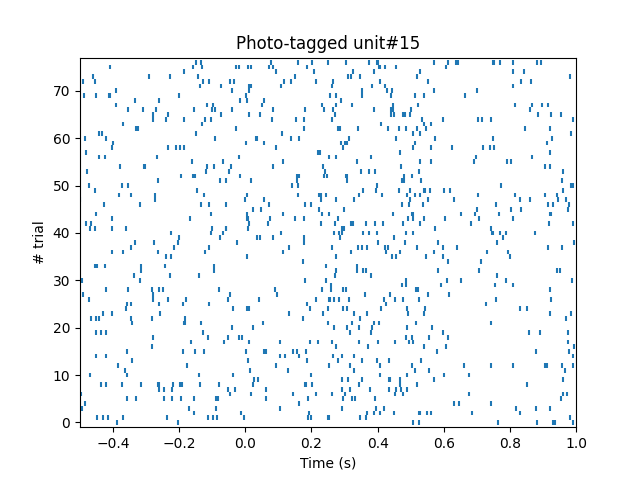

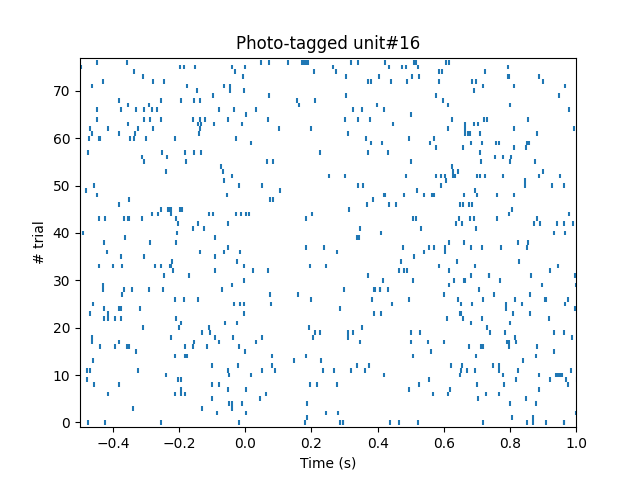

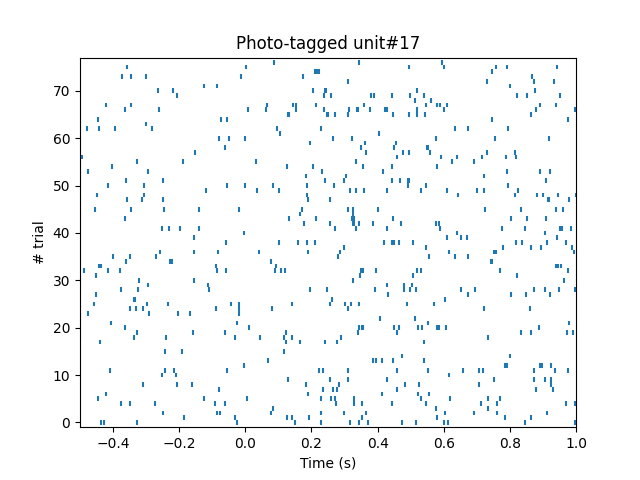

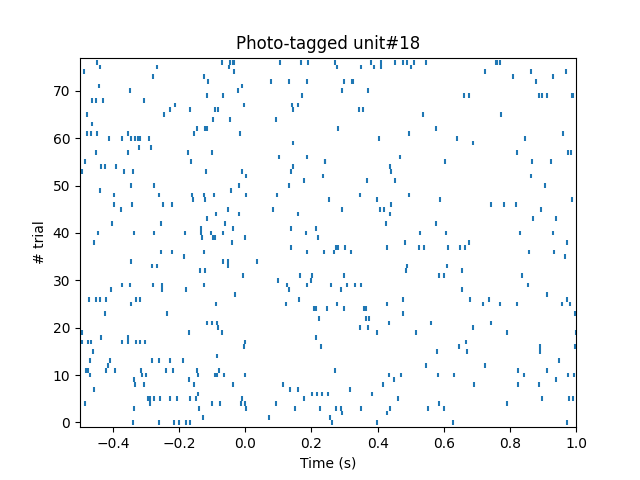

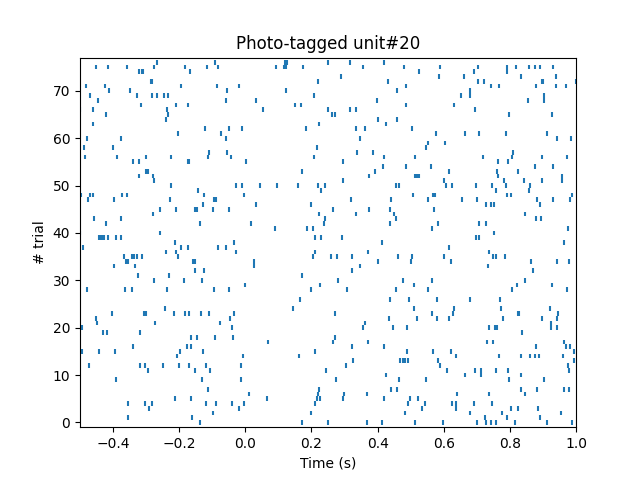

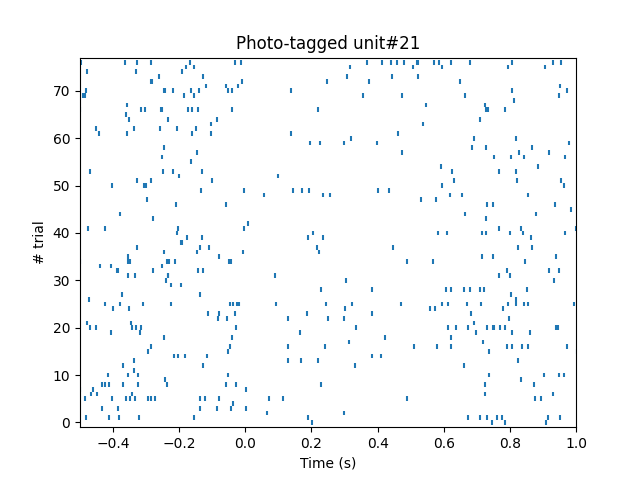

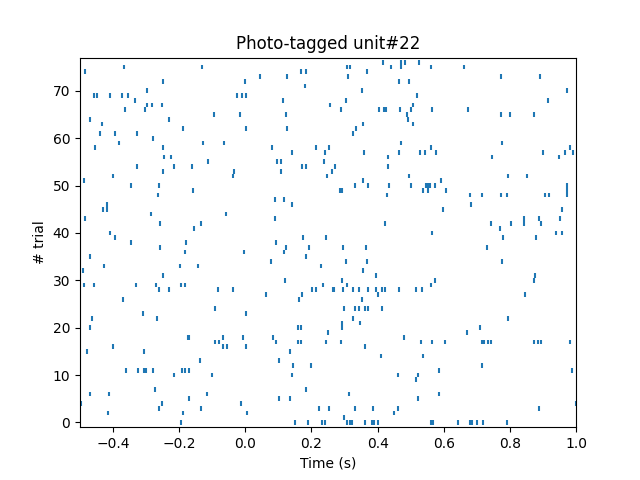

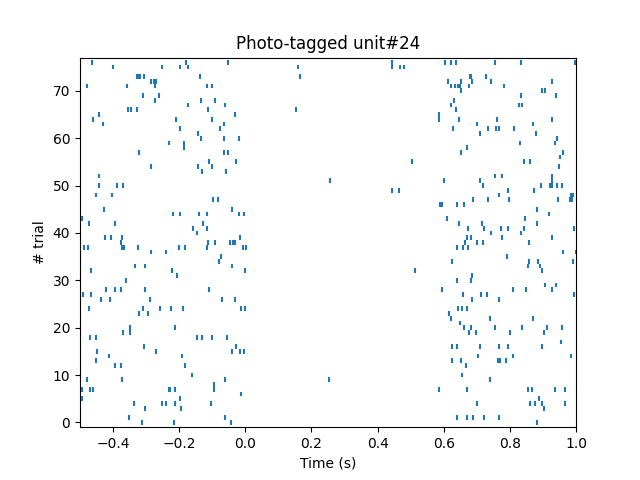

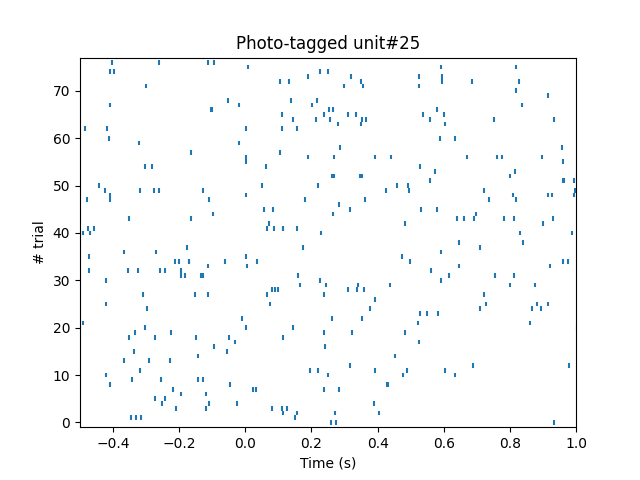

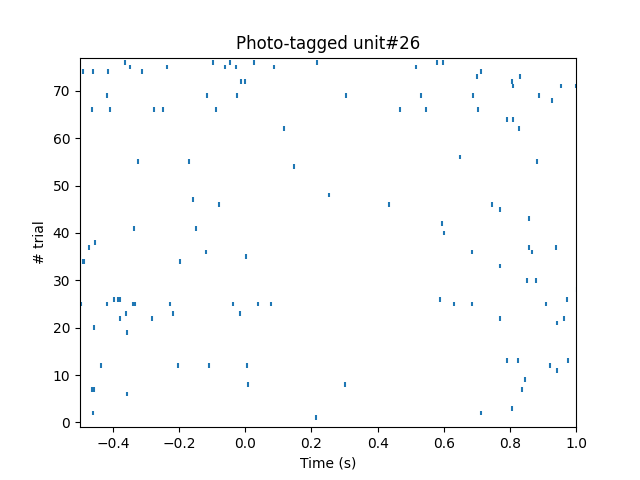

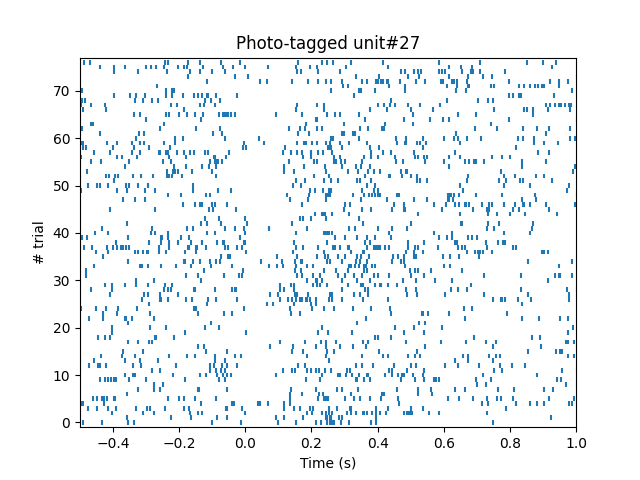

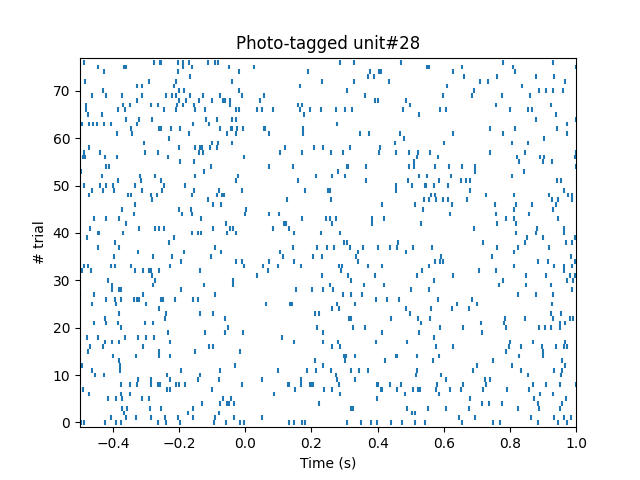

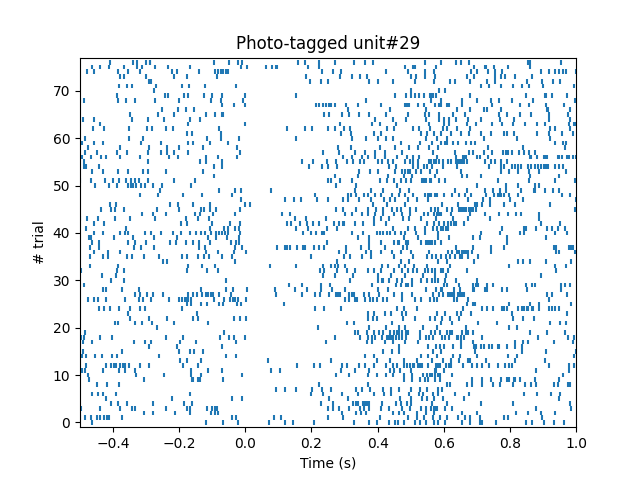

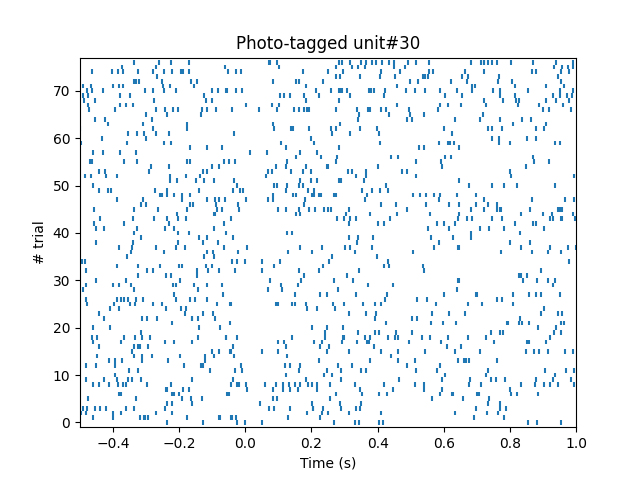

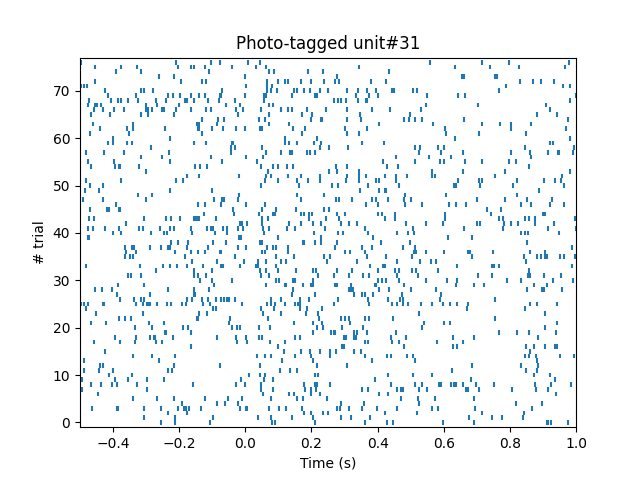

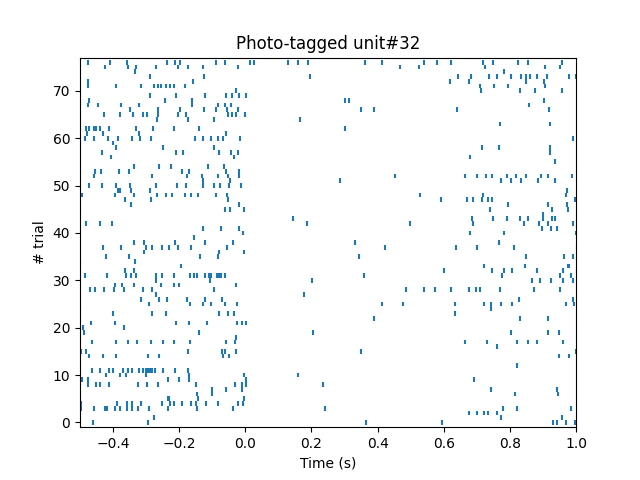

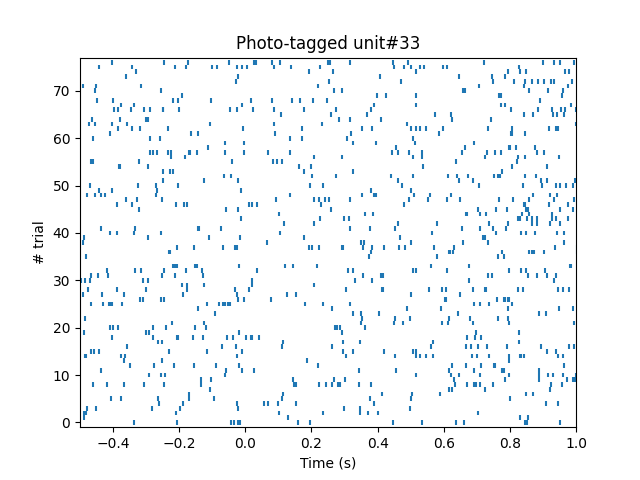

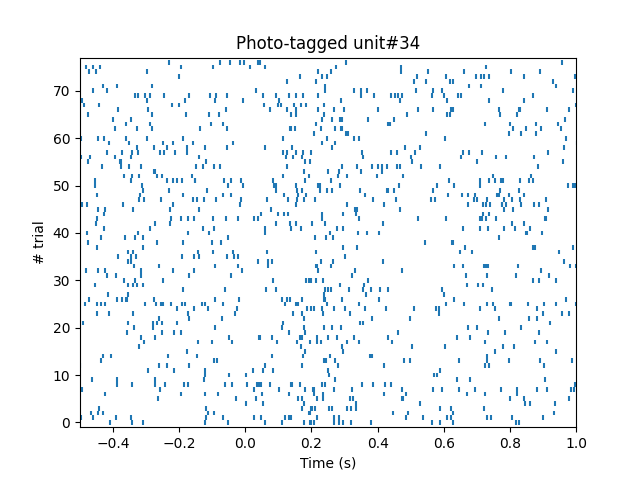

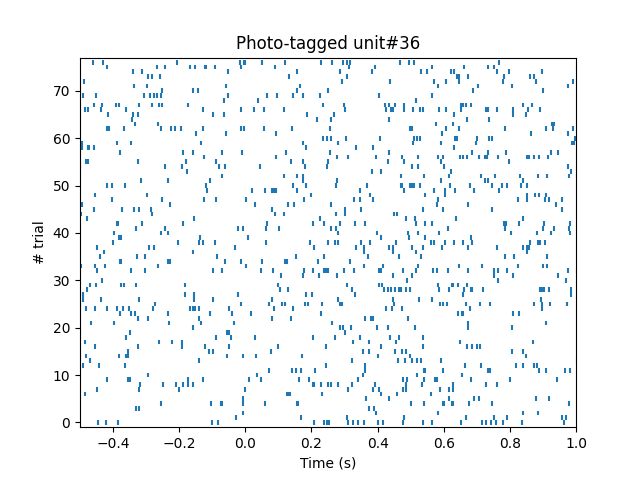

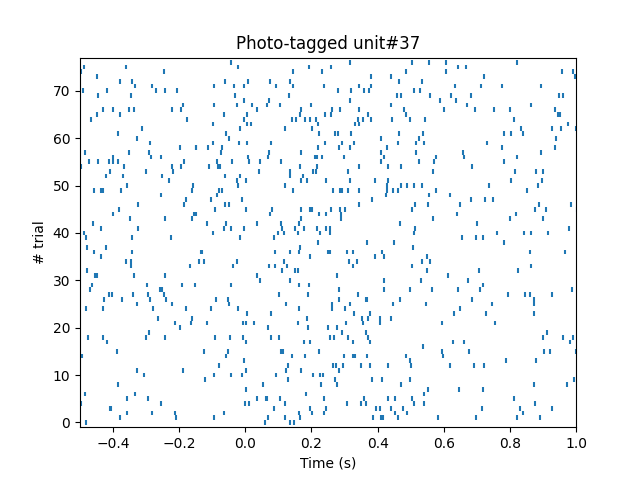

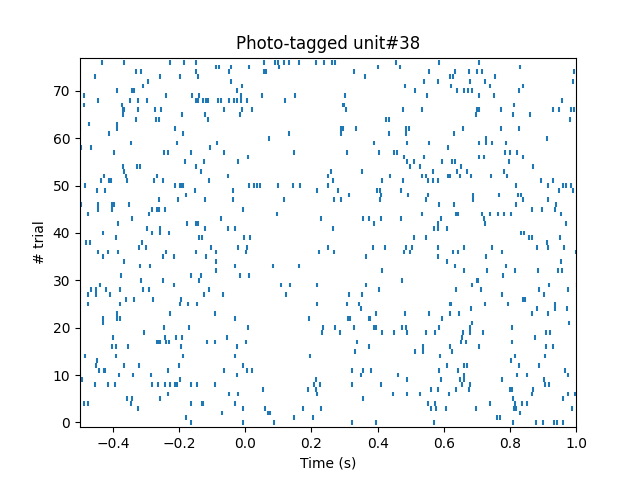

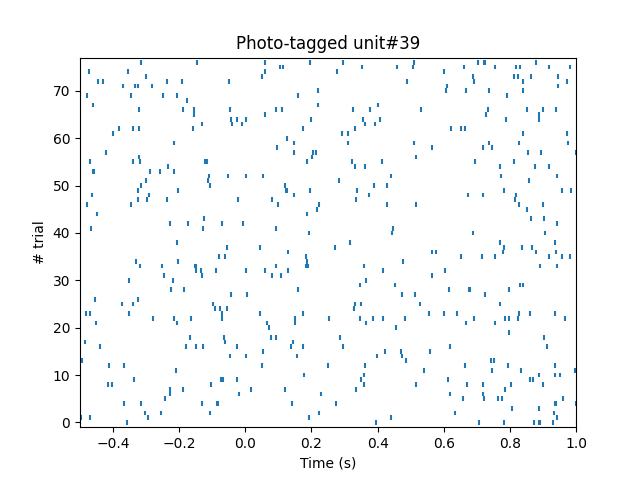

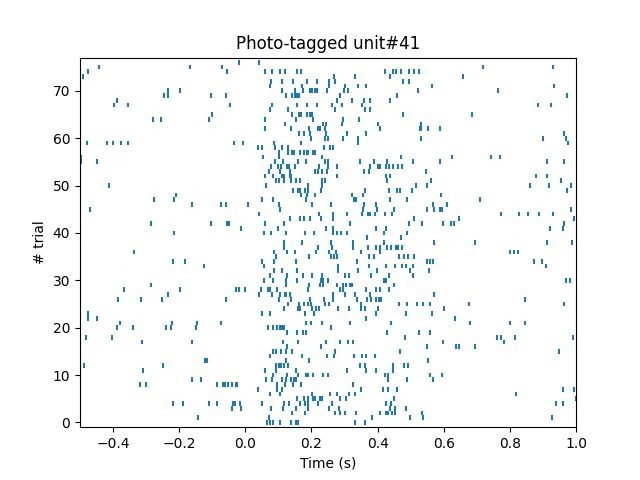

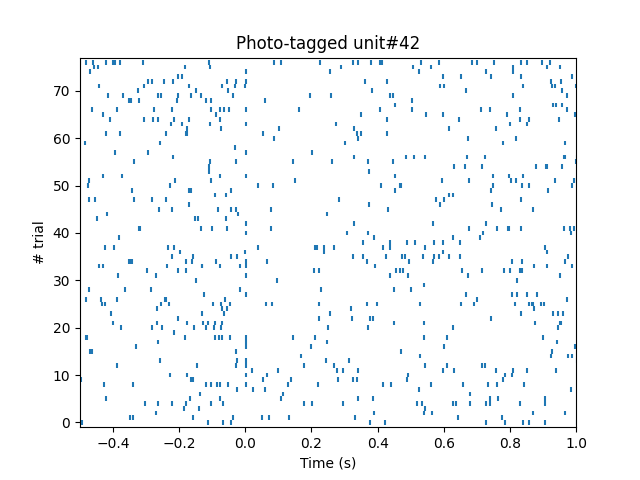

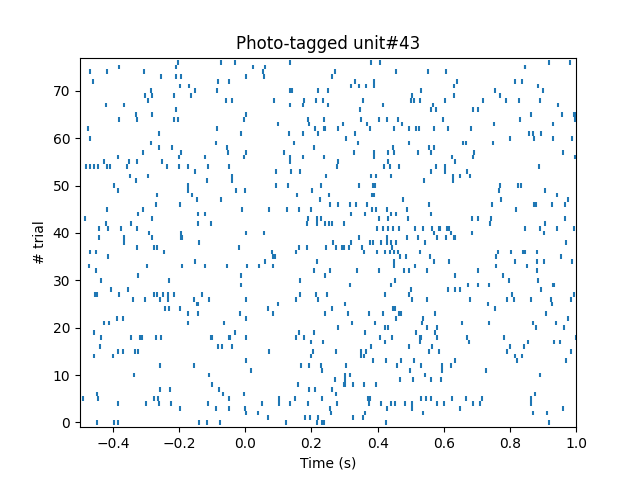

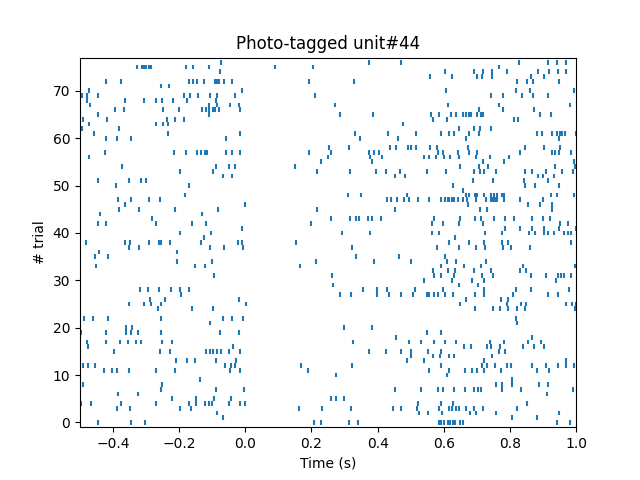

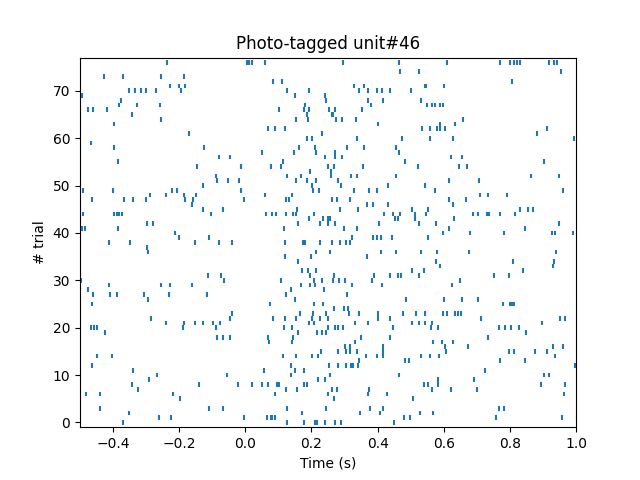

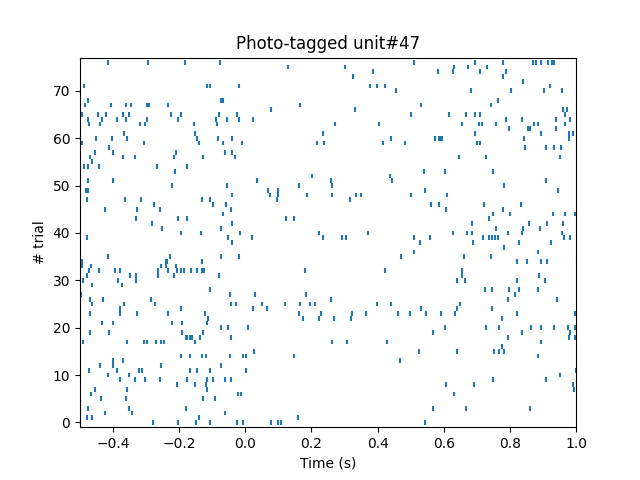

In [104]:
seeModulation('first', 0, velocityalpha=0.3, velocitycolor='c')

In [105]:
Modulation_saving_folder = os.path.join(saving_folder, 'Modulation', exp_id)
os.makedirs(Modulation_saving_folder, exist_ok=True)
for modulated in ['CW_+', 'CCW_+', 'CW_-', 'CCW_-', 'both_++', 'both_--', 'both_+-', 'both_-+']:
    os.makedirs(os.path.join(Modulation_saving_folder, modulated), exist_ok=True)

for condition in ['second']:
    for modulationWay, modulationPath in zip(['CW +', 'CCW +', 'CW -', 'CCW -', 'both +/+', 'both -/-', 'both +/-', 'both -/+'], ['CW_+', 'CCW_+', 'CW_-', 'CCW_-', 'both_++', 'both_--', 'both_+-', 'both_-+']):
        seeModulation(condition, modulationWay, show=False, save=True, filename=os.path.join(Modulation_saving_folder, modulationPath, f"Modulation_{exp_id}_unit#{unit}.png"))

The CW + modulated neurons are [ 1  2 11 12 25 33 40]
















The CCW + modulated neurons are [21 43]




The CW - modulated neurons are [26]


The CCW - modulated neurons are [22]


The both +/+ modulated neurons are [ 0  5  7  8  9 13 14 15 16 17 19 20 24 27 28 29 31 34 35 36 38 41 44]














































The both -/- modulated neurons are []
The both +/- modulated neurons are [18 32]




The both -/+ modulated neurons are [ 3 47]






In [106]:
seeModulation('second', 'both +/+', velocityalpha=0.3, velocitycolor='c', show=False)

The both +/+ modulated neurons are [ 0  5  7  8  9 13 14 15 16 17 19 20 24 27 28 29 31 34 35 36 38 41 44]


### <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Showing Numerical Results</strong></span>

In [107]:
print(f"Unit of first condition, significant photo-tagging : {significance_vMI['first']}\n")

print(f"Unit CW of second condition, significant modulation : {significance_vMI['second']['CW'][0]}\n")

print(f"Unit CCW of second condition, significant modulation : {significance_vMI['second']['CCW'][0]}")


Unit of first condition, significant photo-tagging : [ 0 19 23 35 40 45]

Unit CW of second condition, significant modulation : [ 0  1  2  3  5  7  8  9 11 12 13 14 15 16 17 18 19 20 24 25 26 27 28 29
 31 32 33 34 35 36 38 40 41 44 47]

Unit CCW of second condition, significant modulation : [ 0  3  5  7  8  9 13 14 15 16 17 18 19 20 21 22 24 27 28 29 31 32 34 35
 36 38 41 43 44 47]


phototagged or not : [6, 42]
Phototagged neurons responding or not : [4, 2]
Modulation of phototagged neurons : [1, 0, 3]


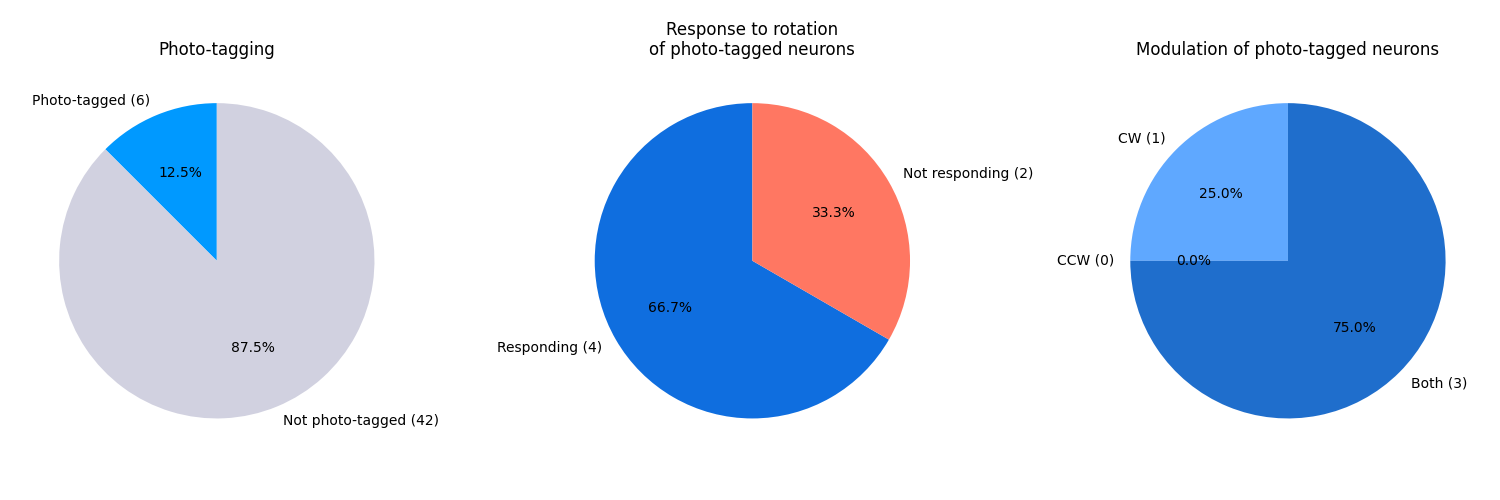



[38, 10]
[8, 3, 27]




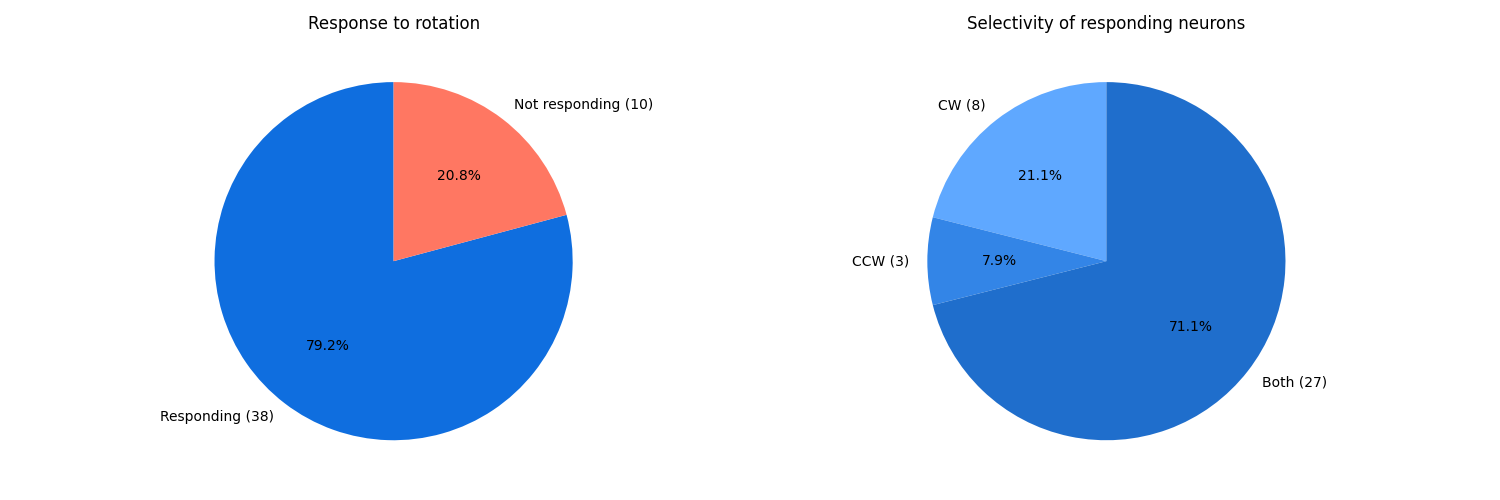

In [108]:
for condition in ['first']:
    phototagged = np.sum(modulation[condition] == 1)
    photo_respBOTH = np.count_nonzero([(modulation['second'][neuron]['selectivity'] == 'both') and (neuron in np.where(modulation['first'] == 1)[0]) for neuron in range(Nclust)])
    photo_respCW = np.count_nonzero([(modulation['second'][neuron]['selectivity'] == 'CW') and (neuron in np.where(modulation['first'] == 1)[0]) for neuron in range(Nclust)])
    photo_respCCW = np.count_nonzero([(modulation['second'][neuron]['selectivity'] == 'CCW') and (neuron in np.where(modulation['first'] == 1)[0]) for neuron in range(Nclust)])
    photo_resp = photo_respBOTH + photo_respCCW + photo_respCW
    photo_notresp = np.count_nonzero([(modulation['second'][neuron]['selectivity'] == 'unmodulated') and (neuron in np.where(modulation['first'] == 1)[0]) for neuron in range(Nclust)])

    non_phototagged = Nclust - phototagged

    plt.rcParams.update({
        "text.usetex": False,
        # "font.family": "Helvetica"
    })

    if photo_resp != 0:
        plt.figure(figsize=(15,5))
        plt.subplot(1,3,1)

        labels = ['Photo-tagged', 'Not photo-tagged']
        valeurs = [phototagged, non_phototagged]
        print(f"phototagged or not : {valeurs}")
        plt.pie(valeurs, labels=["{} ({})".format(label, valeur) for label, valeur in zip(labels, valeurs)], autopct='%1.1f%%', startangle=90, colors=['#0099ff', '#d1d1e0'])
        plt.title('Photo-tagging')


        plt.subplot(1,3,2)
        labels = ['Responding', 'Not responding']
        valeurs = [photo_resp, photo_notresp]
        print(f"Phototagged neurons responding or not : {valeurs}")
        plt.pie(valeurs, labels=["{} ({})".format(label, valeur) for label, valeur in zip(labels, valeurs)], autopct='%1.1f%%', startangle=90, colors=['#0F6EDF', '#FF7762'])
        plt.title('Response to rotation\nof photo-tagged neurons')


        plt.subplot(1,3,3)
        labels = ['CW', 'CCW', 'Both']
        valeurs = [photo_respCW, photo_respCCW, photo_respBOTH]
        print(f"Modulation of phototagged neurons : {valeurs}")
        plt.pie(valeurs, labels=["{} ({})".format(label, valeur) for label, valeur in zip(labels, valeurs)], autopct='%1.1f%%', startangle=90, colors=['#5FA8FF', '#3385E7', '#1F6ECC'])
        plt.title('Modulation of photo-tagged neurons')

        plt.tight_layout()

        if Saving_boolean:
            os.makedirs(os.path.join(saving_folder, 'Distribution'), exist_ok=True)
            plt.savefig(os.path.join(saving_folder, 'Distribution', f"Distribution_{exp_id}_phototagging.png"))

        plt.show()
        print("\n")
    elif phototagged != 0:
        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)

        labels = ['Photo-tagged', 'Not photo-tagged']
        valeurs = [phototagged, non_phototagged]
        print(f"phototagged or not : {valeurs}")
        plt.pie(valeurs, labels=["{} ({})".format(label, valeur) for label, valeur in zip(labels, valeurs)], autopct='%1.1f%%', startangle=90, colors=['#0099ff', '#d1d1e0'])
        plt.title('Photo-tagging')


        plt.subplot(1,2,2)
        labels = ['Responding', 'Not responding']
        valeurs = [photo_resp, photo_notresp]
        print(f"Phototagged neurons responding or not : {valeurs}")
        plt.pie(valeurs, labels=["{} ({})".format(label, valeur) for label, valeur in zip(labels, valeurs)], autopct='%1.1f%%', startangle=90, colors=['#0F6EDF', '#FF7762'])
        plt.title('Response to rotation\nof photo-tagged neurons')

        plt.tight_layout()

        if Saving_boolean:
            os.makedirs(os.path.join(saving_folder, 'Distribution'), exist_ok=True)
            plt.savefig(os.path.join(saving_folder, 'Distribution', f"Distribution_{exp_id}_phototagging.png"))

        plt.show()
        print("\n")
    else:
        plt.figure(figsize=(15,5))

        labels = ['Photo-tagged', 'Not photo-tagged']
        valeurs = [phototagged, non_phototagged]
        print(f"phototagged or not : {valeurs}")
        plt.pie(valeurs, labels=["{} ({})".format(label, valeur) for label, valeur in zip(labels, valeurs)], autopct='%1.1f%%', startangle=90, colors=['#0099ff', '#d1d1e0'])
        plt.title('Photo-tagging')

        if Saving_boolean:
            os.makedirs(os.path.join(saving_folder, 'Distribution'), exist_ok=True)
            plt.savefig(os.path.join(saving_folder, 'Distribution', f"Distribution_{exp_id}_phototagging.png"))

        plt.show()
        print("\n")








for condition in ['second']:
    CWmod = np.count_nonzero([modulation[condition][neuron]['selectivity'] == 'CW' for neuron in range(Nclust)])
    CCWmod = np.count_nonzero([modulation[condition][neuron]['selectivity'] == 'CCW' for neuron in range(Nclust)])
    BOTHmod = np.count_nonzero([modulation[condition][neuron]['selectivity'] == 'both' for neuron in range(Nclust)])
    resp_units = CWmod + CCWmod + BOTHmod
    nonresp_units = Nclust - resp_units


    labels = ['Responding', 'Not responding']
    valeurs = [resp_units, nonresp_units]
    print(valeurs)

    plt.rcParams.update({
        "text.usetex": False,
        # "font.family": "Helvetica"
    })

    if resp_units != 0:
        plt.figure(figsize=(15,5))
        plt.subplot(1, 2, 1)
        plt.pie(valeurs, labels=["{} ({})".format(label, valeur) for label, valeur in zip(labels, valeurs)], autopct='%1.1f%%', startangle=90, colors=['#0F6EDF', '#FF7762'])
        plt.title('Response to rotation')



        labels_selectivite = ['CW', 'CCW', 'Both']
        valeurs_selectivite = [CWmod, CCWmod, BOTHmod]
        print(valeurs_selectivite)

        print("\n")
        plt.subplot(1, 2, 2)
        plt.pie(valeurs_selectivite, labels=["{} ({})".format(label, valeur) for label, valeur in zip(labels_selectivite, valeurs_selectivite)], autopct='%1.1f%%', startangle=90, colors=['#5FA8FF', '#3385E7', '#1F6ECC'])
        # plt.text(1,1, '', ha='center', va='center', fontsize=12, color='red')
        plt.title('Selectivity of responding neurons')

        plt.tight_layout()
    else:
        plt.figure(figsize=(15,5))
        plt.pie(valeurs, labels=["{} ({})".format(label, valeur) for label, valeur in zip(labels, valeurs)], autopct='%1.1f%%', startangle=90, colors=['#0F6EDF', '#FF7762'])
        plt.title('Response to rotation')

    # plt.suptitle(f"{condition} condition", fontsize=16)

    if Saving_boolean:
        os.makedirs(os.path.join(saving_folder, 'Distribution_population'), exist_ok=True)
        plt.savefig(os.path.join(saving_folder, 'Distribution_population', f"Distribution_{exp_id}_{condition}_condition.png"))
    
    plt.show()


# <span style="border: 2px solid #1c75c8; padding: 3px; background-color: #c5ddf6; color: black"><strong>Saving Variables</strong></span>

In [109]:
if Saving_boolean:
    data = {
        'informative_data': {
            'exp_id': exp_id,
            'timeBef': timeBef,
            'timeAft': timeAft,
            'refValue': refValue,
            'din': din,
            'time': time,
            'chanSpace': chanSpace,
            'rotationSpeed': rotationSpeed,
            'ProbeType': ProbeType,
            # 'f': f,
            'ML_pos': ML_pos,
            'AP_pos': AP_pos
            },
        'Spiking_times': {
            'AllSpikeTimesMUA': AllSpikeTimesMUA,
            'SpikeTimesMUA': SpikeTimesMUA,
            'Ntrial': Ntrial,
            'thresholdTrial': thresholdTrial,
            'AllSpikeTimes': AllSpikeTimes,
            'SpikeTimes': SpikeTimes,
        },
        'Rotation_data': {
            'ref': ref,
            'dref': dref,
            'pic_position': pic_position,
            'RotationWise': RotationWise,
            'Rotation': Rotation,
            'MeanRotation': MeanRotation,
            'duration': duration,
            'table_velocity': table_velocity,
            'shiftReference': shiftReference
        },
        'SUA_data': {
            'c_class': c_class,
            'Nclust': Nclust
        },
        'MUA_data': {
            'm_class': m_class,
            'm_class_tet': m_class_tet,
            'Nclust_mua': Nclust_mua,
            'Ntet': Ntet,
            'allBasem': allBasem,
            'PkDepthUnit': PkDepthUnit,
            'mapp': mapp,
            'ArgallLayers': ArgallLayers,
            'DepthTetrode': DepthTetrode,
            'AllDepth': AllDepth
        },
        'Statistics_data': {
            'windowBef': windowBef,
            'windowDur': windowDur,
            'numberBef': numberBef,
            'numberDur': numberDur,
            'diffBefDur': diffBefDur,
            'sumBefDur': sumBefDur,
            'statistics_vMI': statistics_vMI,
            'statistics_dirMI': statistics_dirMI,
            'p_values_vMI': p_values_vMI,
            'p_values_dirMI': p_values_dirMI,
            'significance_vMI': significance_vMI,
            'significance_dirMI': significance_dirMI,
            'modulation': modulation,
            'preference': preference,
            'vMI':vMI,
            'dirMI': dirMI
        }
    }



    data_saving_folder = os.path.join(saving_folder, 'Data')
    file = os.path.join(data_saving_folder, exp_id+"_data.pickle")

    if not os.path.exists(data_saving_folder):
        os.makedirs(data_saving_folder)

    # from tqdm import tqdm

    # with tqdm(total=100) as pbar:
    #     jd.save(data, os.path.join(saving_folder, exp_id+"_data.json"), progress=lambda *args: pbar.update(100))



    # jd.save(data, os.path.join(data_saving_folder, exp_id+"_data.json"))
        
    # Sauvegarde des variables dans un fichier
    with open(file, 'wb') as FILE_WRITTER:
        pickle.dump(data, FILE_WRITTER)
        FILE_WRITTER.close()